# 1. CRM, BUY 데이터 EDA

- EDA 통해서 데이터 파악
- 가공변수에 어떤걸 사용할 수 있을지 파악

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] =False

pd.options.display.max_rows = 60
pd.set_option('display.max_columns', None)

## 고객 데이터 전처리 통합

In [68]:
buy = pd.read_csv('../data/master_buy.csv', encoding='cp949', index_col = 0)

In [4]:
crm = pd.read_csv('../data/master_crm.csv', encoding='cp949')

In [ ]:
# customer = buy.merge(crm, on = "고객ID", how = "inner")
# customer.to_csv('../data/customer.csv', encoding='utf-8-sig')

#### 각 데이터별 컬럼 확인

In [8]:
crm.columns

Index(['고객ID', '멤버십고객여부', '케어솔루션고객여부', '케어솔루션품목수', '케어십가입여부', '케어십품목수',
       '최근3년구매금액', '최근구매채널', 'Only&Best품목수', '건강관리가전품목수', '연령대', '주거형태',
       '아파트시세', '아파트평형대', '포인트사용빈도', '보유멤버십포인트', '멤버십가입경로', '제휴카드보유여부',
       '프리미엄카드보유여부', '제휴가입여부', '멤버십앱설치여부', '거주광역명', '거주시군구명', '거주행정동명',
       'label'],
      dtype='object')

In [9]:
buy.columns

Index(['고객ID', '매출일자(배송완료일자)', '타겟제품명', '금액', 'label'], dtype='object')

### buy features
- 매출일자(배송완료일자) : 
- 타겟제품명 : 고객이 구매한 제품
- 금액 : 100만원 단위로 나눠져있음
- label_x : 올해 2023년 구매 여부

### crm features
- 고객ID : 
- 멤버십고객여부 : 
- 케어솔루션고객여부 : LG전자 제품을 렌탈한 고객들에게 LG전자의 가전 전문가들이 제품을 오래 깨끗하게 안심하고 사용하실 수 있도록 전문적으로 케어하는 LG전자만의 가전 관리 서비스입니다.
- 케어솔루션품목수 :
- 케어십가입여부 : LG전자 제품을 구입하여 사용하시거나, 케어솔루션(렌탈) 계약기간이 끝난 고객이 신청할 수 있는 가전 제품 관리 서비스입니다.
- 케어십품목수
- 최근3년구매금액
- 최근구매채널
- Only&Best품목수 : LG에서만 판매하고 있는 가전품목을 의미
- 건강관리가전품목수
- 연령대 : 특이사항 - 60대는 반으로 나눠 짐 (은퇴?)
- 주거형태 : 아파트 혹은 주택
- 아파트시세
- 아파트평형대 
- 포인트사용빈도 : 횟수 (알뜰살뜰 지수?ㅋㅋ)
- 보유멤버십포인트 : 얼만큼 있을때 포인트를 사용했는지. 포인트사용빈도와 합쳐서 충성도지수를 뽑을 수 있지 않나. 
- 멤버십가입경로
- 제휴카드보유여부 : 0, 1
- 프리미엄카드보유여부
- 제휴가입여부 : ??
- 멤버십앱설치여부
- 거주광역명
- 거주시군구명
- 거주행정동명
- label : 올해 2023년 구매 여부



*https://www.lge.co.kr/kr/ebook/2022/april/care_best/catImage/61/202204_careship_catalogue_best.pdf

#### 고객, 구매 데이터 통합

In [10]:
customer = buy.merge(crm, on = "고객ID", how = "inner")
# customer

In [18]:
customer['매출일자(배송완료일자)'] = pd.to_datetime(customer['매출일자(배송완료일자)'], format='%Y-%m-%d')

In [19]:
crm['아파트시세'].value_counts()

1~2억      23237
3~4억      19885
5~6억      11495
7~8억       6869
1억↓        6334
11~15억     3963
9~10억      3675
16~29억     2432
30억↑        513
Name: 아파트시세, dtype: int64

#### 결측치 확인

In [13]:
customer.isna().sum() / len(customer) * 100

고객ID             0.000000
매출일자(배송완료일자)     0.000000
타겟제품명            0.000000
금액               0.063459
label_x          0.000000
멤버십고객여부          1.296409
케어솔루션고객여부       54.746585
케어솔루션품목수         0.000000
케어십가입여부          0.000000
케어십품목수           0.000000
최근3년구매금액         0.000000
최근구매채널           0.000751
Only&Best품목수     0.000000
건강관리가전품목수        0.000000
연령대              5.256043
주거형태             0.000000
아파트시세           24.062708
아파트평형대          24.062708
포인트사용빈도          0.000000
보유멤버십포인트        85.009528
멤버십가입경로          1.296409
제휴카드보유여부         0.000000
프리미엄카드보유여부       0.000000
제휴가입여부           0.000000
멤버십앱설치여부         1.296409
거주광역명            3.530439
거주시군구명           3.542830
거주행정동명           4.833795
label_y          0.000000
dtype: float64

### 가장 최근에 휴대폰을 구매한 내역

- LG기업에서 휴대폰을 판매를 중단했기 때문에 휴대폰을 구매가망지수에 포함시키는게 맞는지 확인하기 위함
- 최근에 구매한 날짜가 2023년이기에 휴대폰도 포함할 예정

In [20]:
phone_purchases = buy[buy['타겟제품명'] == '휴대폰']

phone_purchases = phone_purchases.sort_values(by='매출일자(배송완료일자)', ascending=False)
latest_phone_purchase_date = phone_purchases.iloc[0]['매출일자(배송완료일자)']
latest_phone_purchase_date

20230821.0

### 고객별로 언제 어떤 제품을 샀는지를 그룹화

In [21]:
customer_purchase_data = buy[['고객ID', '매출일자(배송완료일자)', '타겟제품명']]

customer_purchase_data_grouped = customer_purchase_data.groupby(['고객ID', '매출일자(배송완료일자)'])['타겟제품명'].unique().reset_index()

customer_purchase_data_grouped

,고객ID,매출일자(배송완료일자),타겟제품명
0,1,20170628.0,[정수기]
1,1,20170630.0,[정수기]
2,1,20220111.0,[스타일러]
3,2,20111109.0,[김치냉장고]
4,2,20200109.0,[전기레인지]
...,...,...,...
380486,104350,20230311.0,[정수기]
380487,104351,20180326.0,"[세탁기, 공기청정기, TV]"
380488,104351,20211105.0,[청소기]
380489,104351,20221108.0,[모니터]


### 10일 이내에 새로운 제품을 산 경우, 날짜를 동일하게 설정

In [30]:
customer_purchase_data = buy.sort_values(by=['고객ID', '매출일자(배송완료일자)'])

customer_purchase_data['날짜차이'] = customer_purchase_data.groupby('고객ID')['매출일자(배송완료일자)'].diff()

customer_purchase_data['매출일자(배송완료일자)'] = pd.to_datetime(customer_purchase_data['매출일자(배송완료일자)'], format='%Y%m%d')

customer_purchase_data['날짜차이'] = pd.to_timedelta(customer_purchase_data['날짜차이'])

# 10일 이내에 새로운 제품을 산 경우, 날짜를 동일하게 설정
customer_purchase_data['매출일자(배송완료일자)'] = customer_purchase_data.apply(
    lambda row: row['매출일자(배송완료일자)'] - row['날짜차이'] if pd.notna(row['날짜차이']) and row['날짜차이'] <= timedelta(days=10) else row['매출일자(배송완료일자)'],
    axis=1)

customer_purchase_data.drop(columns='날짜차이', inplace=True)

customer_purchase_data

/Users/Lee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/Users/Lee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


,고객ID,매출일자(배송완료일자),타겟제품명,금액,label
310665,1,2017-06-28 00:00:00.000000000,정수기,0만원 이상 100만원 이하,0
98944,1,2017-06-29 23:59:59.999999998,정수기,0만원 이상 100만원 이하,0
372711,1,2022-01-10 23:59:59.999950519,스타일러,200만원 이상 300만원 이하,0
422545,2,2011-11-09 00:00:00.000000000,김치냉장고,100만원 이상 200만원 이하,0
27840,2,2020-01-08 23:59:59.999911000,전기레인지,0만원 이상 100만원 이하,0
...,...,...,...,...,...
468459,104351,2018-03-26 00:00:00.000000000,공기청정기,0만원 이상 100만원 이하,1
501687,104351,2018-03-26 00:00:00.000000000,TV,200만원 이상 300만원 이하,1
492387,104351,2021-11-04 23:59:59.999969221,청소기,0만원 이상 100만원 이하,1
448599,104351,2022-11-07 23:59:59.999989997,모니터,0만원 이상 100만원 이하,1


### 각 고객이 분기별로 구매한 제품 수

In [69]:
buy['매출일자(배송완료일자)'] = pd.to_datetime(buy['매출일자(배송완료일자)'], format='%Y%m%d')

# 날짜에서 년도와 분기를 추출
buy['년도'] = buy['매출일자(배송완료일자)'].dt.year
buy['분기'] = buy['매출일자(배송완료일자)'].dt.quarter

In [70]:
customer_purchase_data_grouped = buy.groupby(['고객ID', '년도', '분기'])['타겟제품명'].unique().reset_index()

In [71]:
customer_purchase_data_grouped

,고객ID,년도,분기,타겟제품명
0,1,2017,2,[정수기]
1,1,2022,1,[스타일러]
2,2,2011,4,[김치냉장고]
3,2,2020,1,[전기레인지]
4,2,2021,4,[세탁기]
...,...,...,...,...
328053,104350,2023,1,[정수기]
328054,104351,2018,1,"[세탁기, 공기청정기, TV]"
328055,104351,2021,4,[청소기]
328056,104351,2022,4,[모니터]


In [72]:
customer_purchase_data_grouped['제품수'] = customer_purchase_data_grouped['타겟제품명'].apply(lambda x: len(x))

In [73]:
customer_purchase_data_grouped

,고객ID,년도,분기,타겟제품명,제품수
0,1,2017,2,[정수기],1
1,1,2022,1,[스타일러],1
2,2,2011,4,[김치냉장고],1
3,2,2020,1,[전기레인지],1
4,2,2021,4,[세탁기],1
...,...,...,...,...,...
328053,104350,2023,1,[정수기],1
328054,104351,2018,1,"[세탁기, 공기청정기, TV]",3
328055,104351,2021,4,[청소기],1
328056,104351,2022,4,[모니터],1


### 분기별 주기 찾기

고객 구매내역의 변동 폭

- 변동 폭이 다양하게 나타나니 구매가망지수를 도출할 때 변동 폭을 고려해줘야한다.
- 지금은 절대값으로 (변동의 방향 고려하지 못함.)
- 방향도 고려해줘야함 (추후)

In [74]:
buy.head(3)

,고객ID,매출일자(배송완료일자),타겟제품명,금액,label,년도,분기
0,34410,2022-04-29,에어컨,300만원 이상 400만원 이하,0,2022,2
1,16983,2020-10-17,냉장고,200만원 이상 300만원 이하,0,2020,4
2,59837,2020-12-20,뷰티기기,0만원 이상 100만원 이하,0,2020,4


In [75]:
grouped = buy.groupby(['고객ID', '년도', '분기'])

In [76]:
count_per_group = grouped.size().reset_index(name='거래내역 수')

In [77]:
pivot_table = count_per_group.pivot_table(index='고객ID', columns=['년도', '분기'], values='거래내역 수', fill_value=0)

In [78]:
variance = pivot_table.diff(axis=1)

In [79]:
buy.loc[buy.고객ID == 1135, :]

,고객ID,매출일자(배송완료일자),타겟제품명,금액,label,년도,분기
77034,1135,2019-06-18,공기청정기,100만원 이상 200만원 이하,0,2019,2
156339,1135,2018-03-08,청소기,0만원 이상 100만원 이하,0,2018,1
224324,1135,2019-06-16,공기청정기,0만원 이상 100만원 이하,0,2019,2
271994,1135,2018-03-10,스타일러,100만원 이상 200만원 이하,0,2018,1
317390,1135,2018-03-17,세탁기,300만원 이상 400만원 이하,0,2018,1
380381,1135,2018-05-02,뷰티기기,0만원 이상 100만원 이하,0,2018,2
393987,1135,2018-02-24,건조기,100만원 이상 200만원 이하,0,2018,1


In [80]:
# 고객ID, 연도, 분기를 기준으로 그룹화
grouped = buy.groupby(['고객ID', '년도', '분기'])

# 각 그룹에서 거래내역 수 계산
count_per_group = grouped.size().reset_index(name='거래내역 수')

# 고객별로 분기별 변동 계산
count_per_group['변동'] = count_per_group.groupby('고객ID')['거래내역 수'].diff()

In [81]:
count_per_group['변동'] = count_per_group['변동'].apply(lambda x : abs(x))

In [82]:
count_per_group

,고객ID,년도,분기,거래내역 수,변동
0,1,2017,2,2,NaN
1,1,2022,1,1,1.0
2,2,2011,4,1,NaN
3,2,2020,1,1,0.0
4,2,2021,4,1,0.0
...,...,...,...,...,...
328053,104350,2023,1,1,4.0
328054,104351,2018,1,3,NaN
328055,104351,2021,4,1,2.0
328056,104351,2022,4,1,0.0


In [83]:
crm_variation = count_per_group.groupby(['고객ID'])['변동'].sum()

In [84]:
df_variation = crm_variation.to_frame()

In [86]:
df_variation['변동'].describe()

count    102723.000000
mean          1.981066
std           1.810357
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          10.000000
Name: 변동, dtype: float64

/Users/Lee/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Lee/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


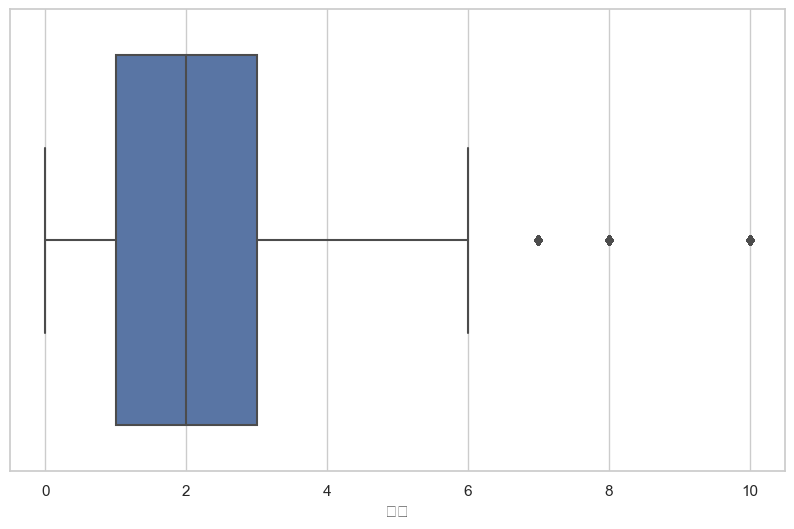

In [87]:
# '변동' 열에 대한 boxplot 그리기
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='변동', data=df_variation)
plt.show()

# 2.

### 잠재적 고가 제품 구매 고객

In [89]:
buy['금액'].unique()

array(['300만원 이상 400만원 이하', '200만원 이상 300만원 이하', '0만원 이상 100만원 이하',
       '100만원 이상 200만원 이하', nan, '500만원 이상 600만원 이하', '400만원 이상 500만원 이하',
       '700만원 이상 800만원 이하', '600만원 이상 700만원 이하', '800만원 이상 900만원 이하',
       '900만원 이상 1000만원 이하', '1000만원 이상'], dtype=object)

In [95]:
buy.loc[buy['금액']=='0만원 이상 100만원 이하', '금액2'] = 50
buy.loc[buy['금액']=='100만원 이상 200만원 이하', '금액2'] = 150
buy.loc[buy['금액']=='200만원 이상 300만원 이하', '금액2'] = 250
buy.loc[buy['금액']=='300만원 이상 400만원 이하', '금액2'] = 350
buy.loc[buy['금액']=='400만원 이상 500만원 이하', '금액2'] = 450
buy.loc[buy['금액']=='500만원 이상 600만원 이하', '금액2'] = 550
buy.loc[buy['금액']=='600만원 이상 700만원 이하', '금액2'] = 650
buy.loc[buy['금액']=='700만원 이상 800만원 이하', '금액2'] = 750
buy.loc[buy['금액']=='800만원 이상 800만원 이하', '금액2'] = 850
buy.loc[buy['금액']=='900만원 이상 1000만원 이하', '금액2'] = 950
buy.loc[buy['금액']=='1000만원 이상', '금액2'] = 1000
buy.loc[buy['금액'].isnull(), '금액2'] = np.nan

In [97]:
# 임의로 450 threshold로 고가여부 설정
def preferred_price_category(x):
    if x >= 450:
        return 1
    else:
        return 0
    

buy['고가여부'] = buy['금액2'].apply(lambda x: preferred_price_category(x))

buy

,고객ID,매출일자(배송완료일자),타겟제품명,금액,label,년도,분기,금액2,고가여부
0,34410,2022-04-29,에어컨,300만원 이상 400만원 이하,0,2022,2,350.0,0
1,16983,2020-10-17,냉장고,200만원 이상 300만원 이하,0,2020,4,250.0,0
2,59837,2020-12-20,뷰티기기,0만원 이상 100만원 이하,0,2020,4,50.0,0
3,18782,2022-06-10,에어컨,0만원 이상 100만원 이하,0,2022,2,50.0,0
4,68424,2014-09-29,냉장고,300만원 이상 400만원 이하,0,2014,3,350.0,0
...,...,...,...,...,...,...,...,...,...
532620,98660,2023-08-07,에어컨,0만원 이상 100만원 이하,1,2023,3,50.0,0
532621,88147,2023-02-24,냉장고,100만원 이상 200만원 이하,1,2023,1,150.0,0
532622,94092,2023-06-06,냉장고,0만원 이상 100만원 이하,1,2023,2,50.0,0
532623,87872,2023-05-09,김치냉장고,0만원 이상 100만원 이하,1,2023,2,50.0,0


In [98]:
buy[['고객ID', '매출일자(배송완료일자)', '타겟제품명', '금액', 'label', '금액2', '고가여부']]

,고객ID,매출일자(배송완료일자),타겟제품명,금액,label,금액2,고가여부
0,34410,2022-04-29,에어컨,300만원 이상 400만원 이하,0,350.0,0
1,16983,2020-10-17,냉장고,200만원 이상 300만원 이하,0,250.0,0
2,59837,2020-12-20,뷰티기기,0만원 이상 100만원 이하,0,50.0,0
3,18782,2022-06-10,에어컨,0만원 이상 100만원 이하,0,50.0,0
4,68424,2014-09-29,냉장고,300만원 이상 400만원 이하,0,350.0,0
...,...,...,...,...,...,...,...
532620,98660,2023-08-07,에어컨,0만원 이상 100만원 이하,1,50.0,0
532621,88147,2023-02-24,냉장고,100만원 이상 200만원 이하,1,150.0,0
532622,94092,2023-06-06,냉장고,0만원 이상 100만원 이하,1,50.0,0
532623,87872,2023-05-09,김치냉장고,0만원 이상 100만원 이하,1,50.0,0


In [99]:
tmp1 = buy[['고객ID', '고가여부']].groupby(['고객ID']).sum()
tmp1.head(3)

,고가여부
고객ID,
1,0
2,0
3,0


In [103]:
crm = pd.merge(crm, tmp1, on = "고객ID", how = "outer")
crm = crm.rename(columns = {"고가여부":"고가제품구매빈도"})
crm.head(2)

,고객ID,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,label,고가제품구매빈도,고가제품구매빈도,금액
0,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,0,0.0,0.0,3.0
1,2,NaN,0.0,1품목,0,0품목,1KK미만,B2B,2품목,2품목,NaN,아파트,3~4억,40평대,미사용,NaN,NaN,0,0,0,NaN,경기,오산시,대원동,0,0.0,0.0,3.0


In [104]:
tmp1 = buy[['고객ID', '금액']].groupby(['고객ID']).count()
tmp1.head(3)

,금액
고객ID,
1,3
2,3
3,5


In [111]:
crm = pd.merge(crm, tmp1, on = "고객ID", how = "outer")
crm = crm.rename(columns = {"금액":"총구매빈도"})
crm.head()

,고객ID,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,label,고가제품구매빈도,고가제품구매빈도,금액_x,금액_y,고가구매고객여부,총구매빈도
0,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,0,0.0,0.0,3.0,3.0,0,3.0
1,2,NaN,0.0,1품목,0,0품목,1KK미만,B2B,2품목,2품목,NaN,아파트,3~4억,40평대,미사용,NaN,NaN,0,0,0,NaN,경기,오산시,대원동,0,0.0,0.0,3.0,3.0,0,3.0
2,3,NaN,1.0,0품목,0,0품목,0원,하이마트,1품목,2품목,NaN,아파트,5~6억,30평대,미사용,NaN,NaN,0,0,0,NaN,경기,화성시,새솔동,0,0.0,0.0,5.0,5.0,0,5.0
3,4,NaN,0.0,3품목,0,0품목,1KK미만,베스트샵,1품목,2품목,NaN,아파트,1~2억,30평대,미사용,NaN,NaN,0,0,0,NaN,전북,전주시 덕진구,여의동,0,0.0,0.0,3.0,3.0,0,3.0
4,5,NaN,0.0,0품목,1,2품목,1KK이상3KK미만,이마트,1품목,2품목,NaN,아파트,3~4억,40평대,미사용,NaN,NaN,0,0,0,NaN,경기,용인시 처인구,역북동,0,0.0,0.0,6.0,6.0,0,6.0


In [112]:
crm['고가구매고객여부'] = 0
crm.loc[crm['고가구매고객여부'] >= 2.0, '고가구매고객여부'] = 1
crm.head() 

,고객ID,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,label,고가제품구매빈도,고가제품구매빈도,금액_x,금액_y,고가구매고객여부,총구매빈도
0,1,NaN,0.0,0품목,1,2품목,5KK이상10KK미만,홈플러스,2품목,2품목,NaN,아파트,1억↓,20평대,미사용,NaN,NaN,0,0,0,NaN,경기,안산시 상록구,일동,0,0.0,0.0,3.0,3.0,0,3.0
1,2,NaN,0.0,1품목,0,0품목,1KK미만,B2B,2품목,2품목,NaN,아파트,3~4억,40평대,미사용,NaN,NaN,0,0,0,NaN,경기,오산시,대원동,0,0.0,0.0,3.0,3.0,0,3.0
2,3,NaN,1.0,0품목,0,0품목,0원,하이마트,1품목,2품목,NaN,아파트,5~6억,30평대,미사용,NaN,NaN,0,0,0,NaN,경기,화성시,새솔동,0,0.0,0.0,5.0,5.0,0,5.0
3,4,NaN,0.0,3품목,0,0품목,1KK미만,베스트샵,1품목,2품목,NaN,아파트,1~2억,30평대,미사용,NaN,NaN,0,0,0,NaN,전북,전주시 덕진구,여의동,0,0.0,0.0,3.0,3.0,0,3.0
4,5,NaN,0.0,0품목,1,2품목,1KK이상3KK미만,이마트,1품목,2품목,NaN,아파트,3~4억,40평대,미사용,NaN,NaN,0,0,0,NaN,경기,용인시 처인구,역북동,0,0.0,0.0,6.0,6.0,0,6.0


In [113]:
crm.columns

Index(['고객ID', '멤버십고객여부', '케어솔루션고객여부', '케어솔루션품목수', '케어십가입여부', '케어십품목수',
       '최근3년구매금액', '최근구매채널', 'Only&Best품목수', '건강관리가전품목수', '연령대', '주거형태',
       '아파트시세', '아파트평형대', '포인트사용빈도', '보유멤버십포인트', '멤버십가입경로', '제휴카드보유여부',
       '프리미엄카드보유여부', '제휴가입여부', '멤버십앱설치여부', '거주광역명', '거주시군구명', '거주행정동명',
       'label', '고가제품구매빈도', '고가제품구매빈도', '금액_x', '금액_y', '고가구매고객여부', '총구매빈도'],
      dtype='object')

In [114]:
crm[['고객ID','고가제품구매빈도', '총구매빈도', '고가구매고객여부']].head(5)

,고객ID,고가제품구매빈도,고가제품구매빈도,총구매빈도,고가구매고객여부
0,1,0.0,0.0,3.0,0
1,2,0.0,0.0,3.0,0
2,3,0.0,0.0,5.0,0
3,4,0.0,0.0,3.0,0
4,5,0.0,0.0,6.0,0


In [115]:
crm[['고가구매고객여부', '총구매빈도']].groupby(['고가구매고객여부']).describe()

총구매빈도                                            
             count     mean       std  min  25%  50%  75%  max
고가구매고객여부                                                      
0         102723.0  5.18177  1.594917  1.0  4.0  5.0  6.0  8.0

*고가구매를 하는 고객들이 더 많은 제품을 구매한다*

### 각 제품마다 어떤 금액 범주가 있는지 파악

In [118]:
product_price_info = buy[['타겟제품명', '금액']]
product_price_categories = product_price_info.groupby('타겟제품명')['금액'].unique().reset_index()
product_price_categories

,타겟제품명,금액
0,AV,"[0만원 이상 100만원 이하, 100만원 이상 200만원 이하]"
1,PC,"[100만원 이상 200만원 이하, 0만원 이상 100만원 이하, 200만원 이상 ..."
2,TV,"[100만원 이상 200만원 이하, 200만원 이상 300만원 이하, 0만원 이상 ..."
3,건조기,"[100만원 이상 200만원 이하, 200만원 이상 300만원 이하, 0만원 이상 ..."
4,공기청정기,"[0만원 이상 100만원 이하, 100만원 이상 200만원 이하, 200만원 이상 ..."
5,광파오븐,[0만원 이상 100만원 이하]
6,김치냉장고,"[0만원 이상 100만원 이하, 100만원 이상 200만원 이하, 200만원 이상 ..."
7,냉장고,"[200만원 이상 300만원 이하, 300만원 이상 400만원 이하, 100만원 이..."
8,로봇청소기,"[0만원 이상 100만원 이하, 100만원 이상 200만원 이하, 200만원 이상 ..."
9,모니터,"[0만원 이상 100만원 이하, 100만원 이상 200만원 이하]"


In [116]:
# product_price_categories.to_csv('../data/제품별가격대.csv', encoding='utf-8-sig')

In [119]:
buy[(buy['타겟제품명'] == 'TV') & (buy['금액'] == '900만원 이상 1000만원 이하')]


,고객ID,매출일자(배송완료일자),타겟제품명,금액,label,년도,분기,금액2,고가여부
4248,55436,2020-05-02,TV,900만원 이상 1000만원 이하,0,2020,2,950.0,1
8879,1803,2020-01-10,TV,900만원 이상 1000만원 이하,0,2020,1,950.0,1
12001,82973,2016-04-30,TV,900만원 이상 1000만원 이하,0,2016,2,950.0,1
21434,53824,2018-09-01,TV,900만원 이상 1000만원 이하,0,2018,3,950.0,1
22343,53845,2015-07-30,TV,900만원 이상 1000만원 이하,0,2015,3,950.0,1
...,...,...,...,...,...,...,...,...,...
504215,95264,2020-04-13,TV,900만원 이상 1000만원 이하,1,2020,2,950.0,1
509083,98241,2015-10-20,TV,900만원 이상 1000만원 이하,1,2015,4,950.0,1
509997,99789,2020-03-05,TV,900만원 이상 1000만원 이하,1,2020,1,950.0,1
515644,92305,2017-02-17,TV,900만원 이상 1000만원 이하,1,2017,1,950.0,1


In [120]:
buy[buy['고객ID'] == 95264]

,고객ID,매출일자(배송완료일자),타겟제품명,금액,label,년도,분기,금액2,고가여부
460547,95264,2022-07-06,냉장고,500만원 이상 600만원 이하,1,2022,3,550.0,1
461611,95264,2018-11-30,청소기,0만원 이상 100만원 이하,1,2018,4,50.0,0
494348,95264,2022-07-06,에어컨,0만원 이상 100만원 이하,1,2022,3,50.0,0
497130,95264,2020-04-16,휴대폰,0만원 이상 100만원 이하,1,2020,2,50.0,0
504215,95264,2020-04-13,TV,900만원 이상 1000만원 이하,1,2020,2,950.0,1
506343,95264,2023-01-19,김치냉장고,200만원 이상 300만원 이하,1,2023,1,250.0,0
507904,95264,2023-01-19,공기청정기,0만원 이상 100만원 이하,1,2023,1,50.0,0
526021,95264,2022-07-06,에어컨,0만원 이상 100만원 이하,1,2022,3,50.0,0


In [121]:
max(buy['매출일자(배송완료일자)'])

Timestamp('2023-08-21 00:00:00')

### 건강관리가전품목수

In [122]:
customer['건강관리가전품목수'].value_counts()

0품목    234122
1품목    184287
2품목     88087
3품목     23216
4품목      2913
Name: 건강관리가전품목수, dtype: int64

In [123]:
buy['타겟제품명'].value_counts()

에어컨         152876
TV           66837
세탁기          52594
냉장고          44607
청소기          38610
김치냉장고        24757
공기청정기        23566
건조기          21198
정수기          20712
휴대폰          17451
PC           16394
스타일러         10439
식기세척기         8707
전기레인지         8563
뷰티기기          6783
미니워시          5619
얼음정수기냉장고      4239
워시타워          3060
모니터           2083
AV            1136
로봇청소기          983
안마의자           755
시그니처TV         502
시그니처냉장고         60
시그니처세탁기         51
시그니처공청기         35
시그니처기타           5
시그니처에어컨          2
광파오븐             1
Name: 타겟제품명, dtype: int64

### 평균 주기 찾기

In [124]:
# 30일 안에 구매한 제품을 같은 날 구매한걸로 바꾸기
average_purchase = buy.groupby(['고객ID', '매출일자(배송완료일자)'])['타겟제품명'].unique().reset_index()
average_purchase = average_purchase.sort_values(by=['고객ID', '매출일자(배송완료일자)'])

average_purchase['날짜차이'] = average_purchase.groupby('고객ID')['매출일자(배송완료일자)'].diff()

average_purchase['매출일자(배송완료일자)'] = average_purchase.apply(
    lambda row: row['매출일자(배송완료일자)'] - row['날짜차이'] if row['날짜차이'] <= timedelta(days=40) else row['매출일자(배송완료일자)'],
    axis=1)

average_purchase

,고객ID,매출일자(배송완료일자),타겟제품명,날짜차이
0,1,2017-06-28,[정수기],NaT
1,1,2017-06-28,[정수기],2 days
2,1,2022-01-11,[스타일러],1656 days
3,2,2011-11-09,[김치냉장고],NaT
4,2,2020-01-09,[전기레인지],2983 days
...,...,...,...,...
380486,104350,2023-03-11,[정수기],1734 days
380487,104351,2018-03-26,"[세탁기, 공기청정기, TV]",NaT
380488,104351,2021-11-05,[청소기],1320 days
380489,104351,2022-11-08,[모니터],368 days


#### 제품별 주기

In [128]:
average_purchase['타겟제품명'] = average_purchase['타겟제품명'].apply(lambda x: ''.join(x))

In [129]:
df_air = average_purchase.loc[average_purchase['타겟제품명'].str.contains('냉장고'), :]

# 고객별로 에어컨 구매 간격을 계산
df_air['구매주기'] = df_air.groupby('고객ID')['매출일자(배송완료일자)'].diff()

average_purchase_interval = df_air['구매주기'].mean()

average_purchase_interval

/var/folders/np/0qvclldj141855670r2yt4g80000gp/T/ipykernel_27418/212061259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air['구매주기'] = df_air.groupby('고객ID')['매출일자(배송완료일자)'].diff()


Timedelta('1097 days 14:48:30.638297872')

In [130]:
df_air = average_purchase.loc[average_purchase['타겟제품명'].str.contains('PC'), :]

# 고객별로 에어컨 구매 간격을 계산
df_air['구매주기'] = df_air.groupby('고객ID')['매출일자(배송완료일자)'].diff()

average_purchase_interval = df_air['구매주기'].mean()

average_purchase_interval

/var/folders/np/0qvclldj141855670r2yt4g80000gp/T/ipykernel_27418/2017742786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air['구매주기'] = df_air.groupby('고객ID')['매출일자(배송완료일자)'].diff()


Timedelta('950 days 23:33:15.428571424')

In [ ]:
buy[buy['고객ID'] == 3201]

### 아파트시세, 평형대

In [132]:
crm.columns # 아파트시세 아파트평형대  거주광역명', '거주시군구명', '거주행정동명

Index(['고객ID', '멤버십고객여부', '케어솔루션고객여부', '케어솔루션품목수', '케어십가입여부', '케어십품목수',
       '최근3년구매금액', '최근구매채널', 'Only&Best품목수', '건강관리가전품목수', '연령대', '주거형태',
       '아파트시세', '아파트평형대', '포인트사용빈도', '보유멤버십포인트', '멤버십가입경로', '제휴카드보유여부',
       '프리미엄카드보유여부', '제휴가입여부', '멤버십앱설치여부', '거주광역명', '거주시군구명', '거주행정동명',
       'label', '고가제품구매빈도', '고가제품구매빈도', '금액_x', '금액_y', '고가구매고객여부', '총구매빈도'],
      dtype='object')

In [133]:
total_df = pd.merge(buy, crm, how = 'outer')
# buy.merge(crm, how = 'inner')

In [134]:
a = total_df.drop_duplicates(subset = "고객ID").copy()
a.head()

,고객ID,매출일자(배송완료일자),타겟제품명,금액,label,년도,분기,금액2,고가여부,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,고가제품구매빈도,고가제품구매빈도,금액_x,금액_y,고가구매고객여부,총구매빈도
0,34410,2022-04-29,에어컨,300만원 이상 400만원 이하,0,2022.0,2.0,350.0,0.0,0.0,NaN,0품목,0,0품목,15KK이상20KK미만,온라인,1품목,1품목,30대,아파트,1~2억,20평대,미사용,NaN,베스트샵,0,0,0,0.0,전북,전주시 덕진구,혁신동,0.0,0.0,6.0,6.0,0,6.0
6,16983,2020-10-17,냉장고,200만원 이상 300만원 이하,0,2020.0,4.0,250.0,0.0,0.0,0.0,3품목,0,0품목,3KK이상5KK미만,B2B,3품목,3품목,40대,아파트,16~29억,40평대,미사용,NaN,베스트샵,0,1,0,0.0,서울,성동구,금호4가동,0.0,0.0,8.0,8.0,0,8.0
14,59837,2020-12-20,뷰티기기,0만원 이상 100만원 이하,0,2020.0,4.0,50.0,0.0,0.0,0.0,0품목,1,1품목,10KK이상15KK미만,베스트샵,3품목,2품목,30대,주택,NaN,NaN,11~12회,30만↓,하이마트,1,1,0,1.0,경기,하남시,덕풍3동,0.0,0.0,8.0,8.0,0,8.0
22,18782,2022-06-10,에어컨,0만원 이상 100만원 이하,0,2022.0,2.0,50.0,0.0,0.0,NaN,0품목,0,0품목,1KK미만,베스트샵,0품목,0품목,50대,아파트,3~4억,30평대,미사용,NaN,전자랜드,0,0,0,0.0,인천,부평구,삼산1동,0.0,0.0,6.0,6.0,0,6.0
28,68424,2014-09-29,냉장고,300만원 이상 400만원 이하,0,2014.0,3.0,350.0,0.0,0.0,NaN,0품목,0,0품목,0원,홈플러스,0품목,0품목,30대,아파트,7~8억,20평대,미사용,NaN,하이마트,0,0,0,0.0,서울,성북구,길음1동,0.0,0.0,3.0,3.0,0,3.0


In [135]:
b = a[['고객ID', '아파트시세','최근3년구매금액']].groupby(['아파트시세','최근3년구매금액']).count()
# b.to_csv('./최근3년구매금액아파트시세.csv', encoding = 'utf-8-sig')

In [136]:
total_df[total_df['최근3년구매금액'] == '30KK↑'].groupby('고객ID').count().describe()

,매출일자(배송완료일자),타겟제품명,금액,label,년도,분기,금액2,고가여부,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,고가제품구매빈도,고가제품구매빈도,금액_x,금액_y,고가구매고객여부,총구매빈도
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,6.310734,6.310734,6.214689,6.333333,6.310734,6.310734,6.214689,6.310734,6.265537,4.474576,6.333333,6.333333,6.333333,6.333333,6.333333,6.333333,6.333333,6.265537,6.333333,4.830508,4.830508,6.333333,1.553672,6.265537,6.333333,6.333333,6.333333,6.265537,6.073446,6.073446,6.028249,6.310734,6.310734,6.310734,6.310734,6.333333,6.310734
std,1.698779,1.698779,1.767513,1.619016,1.698779,1.698779,1.767513,1.698779,1.768602,3.178528,1.619016,1.619016,1.619016,1.619016,1.619016,1.619016,1.619016,1.768602,1.619016,3.034756,3.034756,1.619016,2.846190,1.768602,1.619016,1.619016,1.619016,1.768602,2.031073,2.031073,2.076463,1.698779,1.698779,1.698779,1.698779,1.619016,1.698779
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
50%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,7.000000,0.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
crm['최근3년구매금액'].value_counts()

In [ ]:
# crm[crm['아파트시세'].isna()] # 25949 아파트평형대

In [ ]:
# crm[crm['거주광역명'].isna()] # 3675

In [ ]:
# crm[crm['거주시군구명'].isna()] # 3689

In [137]:
# crm[crm['거주행정동명'].isna()] # 5096

### 질문 : 최근3년구매금액 언제가 기준인지 물어봐야함

### 최근3년간1건당평균구매금액

In [138]:
total_df['year'] = total_df['매출일자(배송완료일자)'].apply(lambda x: x.year)

In [139]:
c = total_df.dropna(subset = ["year"])
c.head()

,고객ID,매출일자(배송완료일자),타겟제품명,금액,label,년도,분기,금액2,고가여부,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,고가제품구매빈도,고가제품구매빈도,금액_x,금액_y,고가구매고객여부,총구매빈도,year
0,34410,2022-04-29,에어컨,300만원 이상 400만원 이하,0,2022.0,2.0,350.0,0.0,0.0,NaN,0품목,0,0품목,15KK이상20KK미만,온라인,1품목,1품목,30대,아파트,1~2억,20평대,미사용,NaN,베스트샵,0,0,0,0.0,전북,전주시 덕진구,혁신동,0.0,0.0,6.0,6.0,0,6.0,2022.0
1,34410,2020-05-25,세탁기,100만원 이상 200만원 이하,0,2020.0,2.0,150.0,0.0,0.0,NaN,0품목,0,0품목,15KK이상20KK미만,온라인,1품목,1품목,30대,아파트,1~2억,20평대,미사용,NaN,베스트샵,0,0,0,0.0,전북,전주시 덕진구,혁신동,0.0,0.0,6.0,6.0,0,6.0,2020.0
2,34410,2022-04-30,건조기,100만원 이상 200만원 이하,0,2022.0,2.0,150.0,0.0,0.0,NaN,0품목,0,0품목,15KK이상20KK미만,온라인,1품목,1품목,30대,아파트,1~2억,20평대,미사용,NaN,베스트샵,0,0,0,0.0,전북,전주시 덕진구,혁신동,0.0,0.0,6.0,6.0,0,6.0,2022.0
3,34410,2022-05-02,뷰티기기,100만원 이상 200만원 이하,0,2022.0,2.0,150.0,0.0,0.0,NaN,0품목,0,0품목,15KK이상20KK미만,온라인,1품목,1품목,30대,아파트,1~2억,20평대,미사용,NaN,베스트샵,0,0,0,0.0,전북,전주시 덕진구,혁신동,0.0,0.0,6.0,6.0,0,6.0,2022.0
4,34410,2022-04-23,TV,200만원 이상 300만원 이하,0,2022.0,2.0,250.0,0.0,0.0,NaN,0품목,0,0품목,15KK이상20KK미만,온라인,1품목,1품목,30대,아파트,1~2억,20평대,미사용,NaN,베스트샵,0,0,0,0.0,전북,전주시 덕진구,혁신동,0.0,0.0,6.0,6.0,0,6.0,2022.0


In [140]:
c['최근3년구매금액'].unique()

array(['15KK이상20KK미만', '3KK이상5KK미만', '10KK이상15KK미만', '1KK미만', '0원',
       '1KK이상3KK미만', '5KK이상10KK미만', '20KK이상25KK미만', '25KK이상30KK미만',
       '30KK↑'], dtype=object)

In [141]:
# 대치할 값들을 딕셔너리로 지정
replace_dict = {'15KK이상20KK미만': 20000000, '3KK이상5KK미만': 3000000, '10KK이상15KK미만': 15000000, '1KK미만':1000000, '0원':0, '1KK이상3KK미만':3000000, "5KK이상10KK미만":10000000, "20KK이상25KK미만":25000000, "25KK이상30KK미만":30000000, "30KK↑":40000000}

# 값들을 대치
c['최근3년구매금액'] = c['최근3년구매금액'].replace(replace_dict)
c.head()

/var/folders/np/0qvclldj141855670r2yt4g80000gp/T/ipykernel_27418/2048010937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['최근3년구매금액'] = c['최근3년구매금액'].replace(replace_dict)


,고객ID,매출일자(배송완료일자),타겟제품명,금액,label,년도,분기,금액2,고가여부,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,고가제품구매빈도,고가제품구매빈도,금액_x,금액_y,고가구매고객여부,총구매빈도,year
0,34410,2022-04-29,에어컨,300만원 이상 400만원 이하,0,2022.0,2.0,350.0,0.0,0.0,NaN,0품목,0,0품목,20000000,온라인,1품목,1품목,30대,아파트,1~2억,20평대,미사용,NaN,베스트샵,0,0,0,0.0,전북,전주시 덕진구,혁신동,0.0,0.0,6.0,6.0,0,6.0,2022.0
1,34410,2020-05-25,세탁기,100만원 이상 200만원 이하,0,2020.0,2.0,150.0,0.0,0.0,NaN,0품목,0,0품목,20000000,온라인,1품목,1품목,30대,아파트,1~2억,20평대,미사용,NaN,베스트샵,0,0,0,0.0,전북,전주시 덕진구,혁신동,0.0,0.0,6.0,6.0,0,6.0,2020.0
2,34410,2022-04-30,건조기,100만원 이상 200만원 이하,0,2022.0,2.0,150.0,0.0,0.0,NaN,0품목,0,0품목,20000000,온라인,1품목,1품목,30대,아파트,1~2억,20평대,미사용,NaN,베스트샵,0,0,0,0.0,전북,전주시 덕진구,혁신동,0.0,0.0,6.0,6.0,0,6.0,2022.0
3,34410,2022-05-02,뷰티기기,100만원 이상 200만원 이하,0,2022.0,2.0,150.0,0.0,0.0,NaN,0품목,0,0품목,20000000,온라인,1품목,1품목,30대,아파트,1~2억,20평대,미사용,NaN,베스트샵,0,0,0,0.0,전북,전주시 덕진구,혁신동,0.0,0.0,6.0,6.0,0,6.0,2022.0
4,34410,2022-04-23,TV,200만원 이상 300만원 이하,0,2022.0,2.0,250.0,0.0,0.0,NaN,0품목,0,0품목,20000000,온라인,1품목,1품목,30대,아파트,1~2억,20평대,미사용,NaN,베스트샵,0,0,0,0.0,전북,전주시 덕진구,혁신동,0.0,0.0,6.0,6.0,0,6.0,2022.0


In [142]:
c = c[c['year'] < 2021]
c.head(3)

,고객ID,매출일자(배송완료일자),타겟제품명,금액,label,년도,분기,금액2,고가여부,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,고가제품구매빈도,고가제품구매빈도,금액_x,금액_y,고가구매고객여부,총구매빈도,year
1,34410,2020-05-25,세탁기,100만원 이상 200만원 이하,0,2020.0,2.0,150.0,0.0,0.0,NaN,0품목,0,0품목,20000000,온라인,1품목,1품목,30대,아파트,1~2억,20평대,미사용,NaN,베스트샵,0,0,0,0.0,전북,전주시 덕진구,혁신동,0.0,0.0,6.0,6.0,0,6.0,2020.0
6,16983,2020-10-17,냉장고,200만원 이상 300만원 이하,0,2020.0,4.0,250.0,0.0,0.0,0.0,3품목,0,0품목,3000000,B2B,3품목,3품목,40대,아파트,16~29억,40평대,미사용,NaN,베스트샵,0,1,0,0.0,서울,성동구,금호4가동,0.0,0.0,8.0,8.0,0,8.0,2020.0
7,16983,2016-07-11,에어컨,0만원 이상 100만원 이하,0,2016.0,3.0,50.0,0.0,0.0,0.0,3품목,0,0품목,3000000,B2B,3품목,3품목,40대,아파트,16~29억,40평대,미사용,NaN,베스트샵,0,1,0,0.0,서울,성동구,금호4가동,0.0,0.0,8.0,8.0,0,8.0,2016.0


In [143]:
tmp = c.groupby('고객ID').count()['year']
tmp.head()

고객ID
1    2
2    2
3    5
4    2
5    6
Name: year, dtype: int64

In [144]:
c = pd.merge(c, tmp, on = "고객ID", how = "outer")
c.head(3)

,고객ID,매출일자(배송완료일자),타겟제품명,금액,label,년도,분기,금액2,고가여부,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,고가제품구매빈도,고가제품구매빈도,금액_x,금액_y,고가구매고객여부,총구매빈도,year_x,year_y
0,34410,2020-05-25,세탁기,100만원 이상 200만원 이하,0,2020.0,2.0,150.0,0.0,0.0,NaN,0품목,0,0품목,20000000,온라인,1품목,1품목,30대,아파트,1~2억,20평대,미사용,NaN,베스트샵,0,0,0,0.0,전북,전주시 덕진구,혁신동,0.0,0.0,6.0,6.0,0,6.0,2020.0,1
1,16983,2020-10-17,냉장고,200만원 이상 300만원 이하,0,2020.0,4.0,250.0,0.0,0.0,0.0,3품목,0,0품목,3000000,B2B,3품목,3품목,40대,아파트,16~29억,40평대,미사용,NaN,베스트샵,0,1,0,0.0,서울,성동구,금호4가동,0.0,0.0,8.0,8.0,0,8.0,2020.0,8
2,16983,2016-07-11,에어컨,0만원 이상 100만원 이하,0,2016.0,3.0,50.0,0.0,0.0,0.0,3품목,0,0품목,3000000,B2B,3품목,3품목,40대,아파트,16~29억,40평대,미사용,NaN,베스트샵,0,1,0,0.0,서울,성동구,금호4가동,0.0,0.0,8.0,8.0,0,8.0,2016.0,8


In [145]:
c = c.rename(columns = {"year_x":"year", "year_y":"최근3년구매횟수"})
c.head(3)

,고객ID,매출일자(배송완료일자),타겟제품명,금액,label,년도,분기,금액2,고가여부,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,고가제품구매빈도,고가제품구매빈도,금액_x,금액_y,고가구매고객여부,총구매빈도,year,최근3년구매횟수
0,34410,2020-05-25,세탁기,100만원 이상 200만원 이하,0,2020.0,2.0,150.0,0.0,0.0,NaN,0품목,0,0품목,20000000,온라인,1품목,1품목,30대,아파트,1~2억,20평대,미사용,NaN,베스트샵,0,0,0,0.0,전북,전주시 덕진구,혁신동,0.0,0.0,6.0,6.0,0,6.0,2020.0,1
1,16983,2020-10-17,냉장고,200만원 이상 300만원 이하,0,2020.0,4.0,250.0,0.0,0.0,0.0,3품목,0,0품목,3000000,B2B,3품목,3품목,40대,아파트,16~29억,40평대,미사용,NaN,베스트샵,0,1,0,0.0,서울,성동구,금호4가동,0.0,0.0,8.0,8.0,0,8.0,2020.0,8
2,16983,2016-07-11,에어컨,0만원 이상 100만원 이하,0,2016.0,3.0,50.0,0.0,0.0,0.0,3품목,0,0품목,3000000,B2B,3품목,3품목,40대,아파트,16~29억,40평대,미사용,NaN,베스트샵,0,1,0,0.0,서울,성동구,금호4가동,0.0,0.0,8.0,8.0,0,8.0,2016.0,8


In [146]:
c.drop_duplicates("고객ID", inplace = True)

In [147]:
c['최근3년간1건당평균구매금액'] = c['최근3년구매금액'] / c['최근3년구매횟수']
c.head()

,고객ID,매출일자(배송완료일자),타겟제품명,금액,label,년도,분기,금액2,고가여부,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,고가제품구매빈도,고가제품구매빈도,금액_x,금액_y,고가구매고객여부,총구매빈도,year,최근3년구매횟수,최근3년간1건당평균구매금액
0,34410,2020-05-25,세탁기,100만원 이상 200만원 이하,0,2020.0,2.0,150.0,0.0,0.0,NaN,0품목,0,0품목,20000000,온라인,1품목,1품목,30대,아파트,1~2억,20평대,미사용,NaN,베스트샵,0,0,0,0.0,전북,전주시 덕진구,혁신동,0.0,0.0,6.0,6.0,0,6.0,2020.0,1,20000000.0
1,16983,2020-10-17,냉장고,200만원 이상 300만원 이하,0,2020.0,4.0,250.0,0.0,0.0,0.0,3품목,0,0품목,3000000,B2B,3품목,3품목,40대,아파트,16~29억,40평대,미사용,NaN,베스트샵,0,1,0,0.0,서울,성동구,금호4가동,0.0,0.0,8.0,8.0,0,8.0,2020.0,8,375000.0
9,59837,2020-12-20,뷰티기기,0만원 이상 100만원 이하,0,2020.0,4.0,50.0,0.0,0.0,0.0,0품목,1,1품목,15000000,베스트샵,3품목,2품목,30대,주택,NaN,NaN,11~12회,30만↓,하이마트,1,1,0,1.0,경기,하남시,덕풍3동,0.0,0.0,8.0,8.0,0,8.0,2020.0,6,2500000.0
15,18782,2020-05-22,에어컨,0만원 이상 100만원 이하,0,2020.0,2.0,50.0,0.0,0.0,NaN,0품목,0,0품목,1000000,베스트샵,0품목,0품목,50대,아파트,3~4억,30평대,미사용,NaN,전자랜드,0,0,0,0.0,인천,부평구,삼산1동,0.0,0.0,6.0,6.0,0,6.0,2020.0,5,200000.0
20,68424,2014-09-29,냉장고,300만원 이상 400만원 이하,0,2014.0,3.0,350.0,0.0,0.0,NaN,0품목,0,0품목,0,홈플러스,0품목,0품목,30대,아파트,7~8억,20평대,미사용,NaN,하이마트,0,0,0,0.0,서울,성북구,길음1동,0.0,0.0,3.0,3.0,0,3.0,2014.0,3,0.0


In [148]:
c.columns

Index(['고객ID', '매출일자(배송완료일자)', '타겟제품명', '금액', 'label', '년도', '분기', '금액2',
       '고가여부', '멤버십고객여부', '케어솔루션고객여부', '케어솔루션품목수', '케어십가입여부', '케어십품목수',
       '최근3년구매금액', '최근구매채널', 'Only&Best품목수', '건강관리가전품목수', '연령대', '주거형태',
       '아파트시세', '아파트평형대', '포인트사용빈도', '보유멤버십포인트', '멤버십가입경로', '제휴카드보유여부',
       '프리미엄카드보유여부', '제휴가입여부', '멤버십앱설치여부', '거주광역명', '거주시군구명', '거주행정동명',
       '고가제품구매빈도', '고가제품구매빈도', '금액_x', '금액_y', '고가구매고객여부', '총구매빈도', 'year',
       '최근3년구매횟수', '최근3년간1건당평균구매금액'],
      dtype='object')

In [149]:
c[['아파트시세', '최근3년간1건당평균구매금액']].groupby(['아파트시세']).describe()

최근3년간1건당평균구매금액                                                       \
                count          mean           std  min  25%            50%   
아파트시세                                                                        
11~15억         3778.0  1.853730e+06  3.631619e+06  0.0  0.0  600000.000000   
16~29억         2294.0  1.929735e+06  3.728253e+06  0.0  0.0  600000.000000   
1~2억          22107.0  1.333846e+06  2.937674e+06  0.0  0.0  428571.428571   
1억↓            6067.0  1.070178e+06  2.369699e+06  0.0  0.0  333333.333333   
30억↑            495.0  2.257475e+06  4.266157e+06  0.0  0.0  750000.000000   
3~4억          18852.0  1.701347e+06  3.511900e+06  0.0  0.0  500000.000000   
5~6억          10938.0  1.682341e+06  3.465399e+06  0.0  0.0  500000.000000   
7~8억           6571.0  1.691039e+06  3.492918e+06  0.0  0.0  500000.000000   
9~10억          3513.0  1.748139e+06  3.445715e+06  0.0  0.0  500000.000000   

                                  
                 75%         max  
아파트시세                             
11~15억  1.666667e+06  40000000.0  
16~29억  2.000000e+06  40000000.0  
1~2억    1.000000e+06  40000000.0  
1억↓     1.000000e+06  30000000.0  
30억↑    2.500000e+06  30000000.0  
3~4억    1.500000e+06  40000000.0  
5~6억    1.500000e+06  40000000.0  
7~8억    1.500000e+06  40000000.0  
9~10억   1.500000e+06  40000000.0

### 연령대

In [150]:
crm['연령대'].value_counts()

40대           31197
50대           26159
30대           18313
60대(60~64)     9578
60대(65~69)     5830
70대            4982
20대            1324
80대↑           1084
10대              22
Name: 연령대, dtype: int64

40대로 나눈뒤 아파트 시세로 나누어서 예측

In [151]:
null_counts = crm.isnull().sum()


In [152]:
null_counts 

고객ID                0
멤버십고객여부          1624
케어솔루션고객여부       58706
케어솔루션품목수            0
케어십가입여부             0
케어십품목수              0
최근3년구매금액            0
최근구매채널              1
Only&Best품목수        0
건강관리가전품목수           0
연령대              5863
주거형태                0
아파트시세           25949
아파트평형대          25949
포인트사용빈도             0
보유멤버십포인트        89803
멤버십가입경로          1624
제휴카드보유여부            0
프리미엄카드보유여부          0
제휴가입여부              0
멤버십앱설치여부         1624
거주광역명            3675
거주시군구명           3689
거주행정동명           5096
label               0
고가제품구매빈도         1629
고가제품구매빈도         1629
금액_x             1629
금액_y             1629
고가구매고객여부            0
총구매빈도            1629
dtype: int64

In [153]:
buy.isnull().sum()

고객ID              0
매출일자(배송완료일자)      0
타겟제품명             0
금액              338
label             0
년도                0
분기                0
금액2             338
고가여부              0
dtype: int64

In [154]:
len(crm) - 25949

78403

In [155]:
crm[crm['보유멤버십포인트'] == 1]

,고객ID,멤버십고객여부,케어솔루션고객여부,케어솔루션품목수,케어십가입여부,케어십품목수,최근3년구매금액,최근구매채널,Only&Best품목수,건강관리가전품목수,연령대,주거형태,아파트시세,아파트평형대,포인트사용빈도,보유멤버십포인트,멤버십가입경로,제휴카드보유여부,프리미엄카드보유여부,제휴가입여부,멤버십앱설치여부,거주광역명,거주시군구명,거주행정동명,label,고가제품구매빈도,고가제품구매빈도,금액_x,금액_y,고가구매고객여부,총구매빈도


In [156]:
crm['보유멤버십포인트'].value_counts()

10만↓    4102
20만↓    2957
5만↓     1917
3만↓     1789
30만↑    1401
30만↓    1242
1만↓     1141
Name: 보유멤버십포인트, dtype: int64

In [157]:
df = crm.merge(buy, how = 'right')

In [158]:
df.isnull().sum()

고객ID                 0
멤버십고객여부           6905
케어솔루션고객여부       291594
케어솔루션품목수             0
케어십가입여부              0
케어십품목수               0
최근3년구매금액             0
최근구매채널               4
Only&Best품목수         0
건강관리가전품목수            0
연령대              27995
주거형태                 0
아파트시세           128164
아파트평형대          128164
포인트사용빈도              0
보유멤버십포인트        452782
멤버십가입경로           6905
제휴카드보유여부             0
프리미엄카드보유여부           0
제휴가입여부               0
멤버십앱설치여부          6905
거주광역명            18804
거주시군구명           18870
거주행정동명           25746
label                0
고가제품구매빈도             0
고가제품구매빈도             0
금액_x                 0
금액_y                 0
고가구매고객여부             0
총구매빈도                0
매출일자(배송완료일자)         0
타겟제품명                0
금액                 338
년도                   0
분기                   0
금액2                338
고가여부                 0
dtype: int64

### 최근구매채널, 멤버십 가입경로 EDA

#### 구매 채널 별 금액 구간별 고객 수

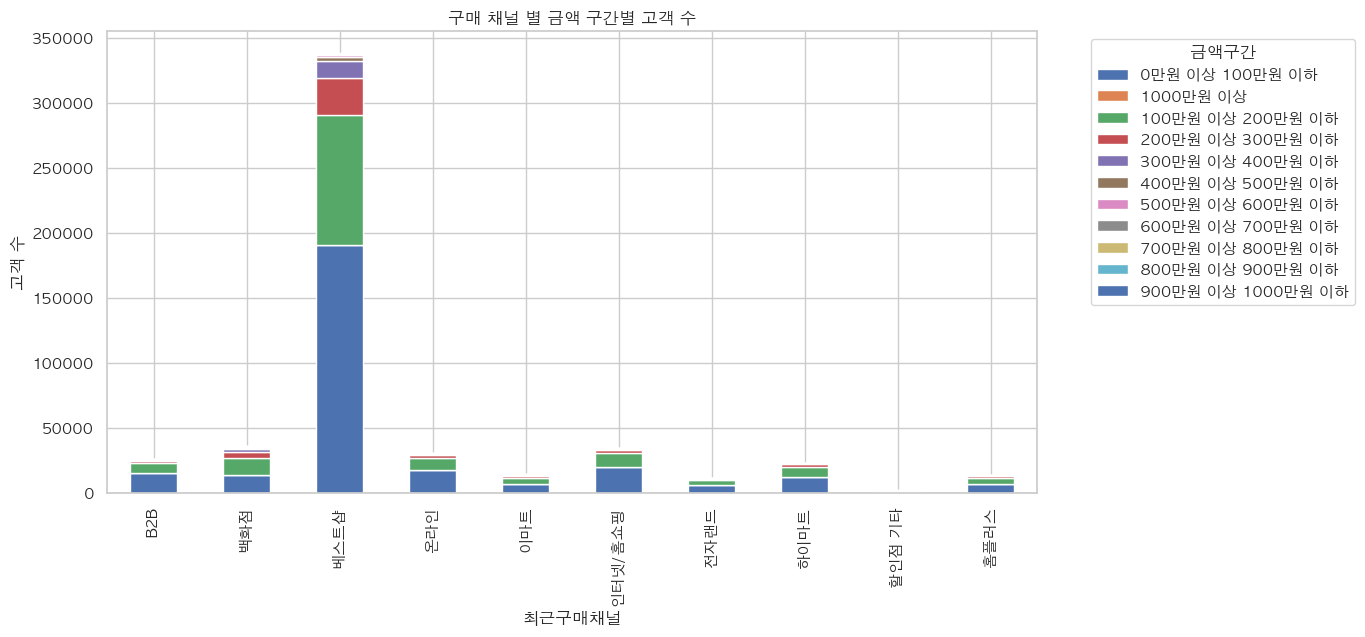

In [161]:
plt.rcParams['font.family'] = 'AppleGothic'

grouped = total_df.groupby(['최근구매채널', '금액'])['고객ID'].count().unstack().fillna(0)

grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('최근구매채널')
plt.ylabel('고객 수')
plt.title('구매 채널 별 금액 구간별 고객 수')
plt.legend(title='금액구간', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 가입경로 별 금액 구간별 고객 수

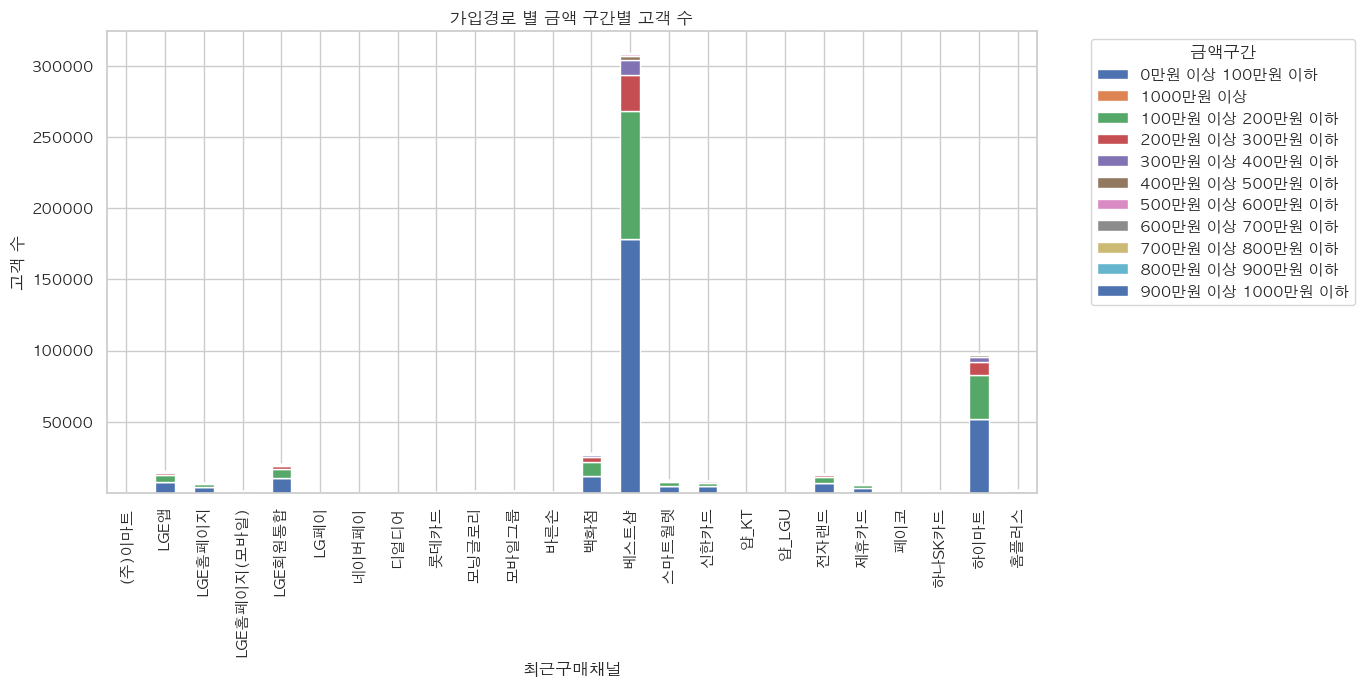

In [162]:
plt.rcParams['font.family'] = 'AppleGothic'

grouped = total_df.groupby(['멤버십가입경로', '금액'])['고객ID'].count().unstack().fillna(0)

grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('최근구매채널')
plt.ylabel('고객 수')
plt.title('가입경로 별 금액 구간별 고객 수')
plt.legend(title='금액구간', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [163]:
grouped = grouped.reset_index()

#### 구매채널별 구매금액의 경향성 파악(고가, 저가)

In [164]:
grouped['채널별빈도합'] = grouped.iloc[:, 1:].sum(axis = 1)


In [165]:
grouped_percent = grouped.copy()

In [166]:

amount_columns = ['0만원 이상 100만원 이하', '100만원 이상 200만원 이하', '200만원 이상 300만원 이하', 
                  '300만원 이상 400만원 이하', '400만원 이상 500만원 이하', '500만원 이상 600만원 이하',
                  '600만원 이상 700만원 이하', '700만원 이상 800만원 이하', '800만원 이상 900만원 이하',
                  '900만원 이상 1000만원 이하', '1000만원 이상']

# '채널별빈도합' 컬럼으로 각 금액 구간 컬럼을 나눔
grouped_percent[amount_columns] = grouped_percent[amount_columns].div(grouped_percent['채널별빈도합'], axis=0) * 100
grouped_percent

금액,멤버십가입경로,0만원 이상 100만원 이하,1000만원 이상,100만원 이상 200만원 이하,200만원 이상 300만원 이하,300만원 이상 400만원 이하,400만원 이상 500만원 이하,500만원 이상 600만원 이하,600만원 이상 700만원 이하,700만원 이상 800만원 이하,800만원 이상 900만원 이하,900만원 이상 1000만원 이하,채널별빈도합
0,(주)이마트,55.893536,0.000000,32.319392,7.984791,1.901141,1.140684,0.760456,0.000000,0.000000,0.000000,0.000000,263.0
1,LGE앱,47.690621,0.077409,34.143981,9.547155,5.689588,1.451426,0.774094,0.316088,0.103212,0.116114,0.090311,15502.0
2,LGE홈페이지,54.243848,0.013824,32.126071,8.045341,3.649433,0.995300,0.566768,0.221178,0.069118,0.041471,0.027647,7234.0
3,LGE홈페이지(모바일),50.122850,0.000000,36.363636,7.862408,3.603604,1.064701,0.573301,0.327600,0.000000,0.081900,0.000000,1221.0
4,LGE회원통합,50.575221,0.117994,32.728614,9.891839,3.387414,1.484759,1.125860,0.344149,0.196657,0.103245,0.044248,20340.0
5,LG페이,61.904762,0.000000,19.047619,19.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.0
6,네이버페이,63.636364,0.000000,22.727273,4.545455,0.000000,0.000000,9.090909,0.000000,0.000000,0.000000,0.000000,22.0
7,디얼디어,35.294118,0.000000,52.941176,5.882353,5.882353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.0
8,롯데카드,54.869359,0.000000,29.928741,8.551069,5.700713,0.237530,0.475059,0.000000,0.237530,0.000000,0.000000,421.0
9,모닝글로리,43.610315,0.000000,36.733524,11.690544,5.730659,1.203438,0.687679,0.286533,0.057307,0.000000,0.000000,1745.0


* 백화점이 타 채널에 비해서 900만원 이상 1000만원 이하 구간만 봤을 때, 0.38%의 비중으로 가장 높은 비중
* 다른 고가 금액대를 보더라도 유의미하게 높은 비중을 차지해서, 백화점이 타 채널에 비해서 고가 구매 경향이 있는 것으로 보임

In [170]:
def insightextract(col1, col2):
    grouped = total_df.groupby([col1, col2])['고객ID'].count().unstack().fillna(0)

    grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.xlabel(col1)
    plt.ylabel(col2)
#     plt.title('구매 채널 별 금액 구간별 고객 수')
    plt.legend(title='금액구간', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    grouped = grouped.reset_index()

    grouped[f'{col1}별빈도합'] = grouped.iloc[:, 1:].sum(axis = 1)

    grouped_percent = grouped.copy()

#     amount_columns = ['0만원 이상 100만원 이하', '100만원 이상 200만원 이하', '200만원 이상 300만원 이하', 
#                       '300만원 이상 400만원 이하', '400만원 이상 500만원 이하', '500만원 이상 600만원 이하',
#                       '600만원 이상 700만원 이하', '700만원 이상 800만원 이하', '800만원 이상 900만원 이하',
#                       '900만원 이상 1000만원 이하', '1000만원 이상']
#     amount_columns = [0, 1]
    
#     amount_columns = ['10대', '20대', '30대', '40대', '50대', '60대(60~64)', '60대(65~69)', '70대', '80대↑']
    
    
    list_col = list(total_df[col2].unique())
    amount_columns = []
    for col in list_col:
        if(str(col) != "nan"):
            amount_columns.append(col)

    # '채널별빈도합' 컬럼으로 각 금액 구간 컬럼을 나눕니다.
    grouped_percent[amount_columns] = grouped_percent[amount_columns].div(grouped_percent[f'{col1}별빈도합'], axis=0) * 100

    # 결과를 출력합니다.
    return grouped_percent

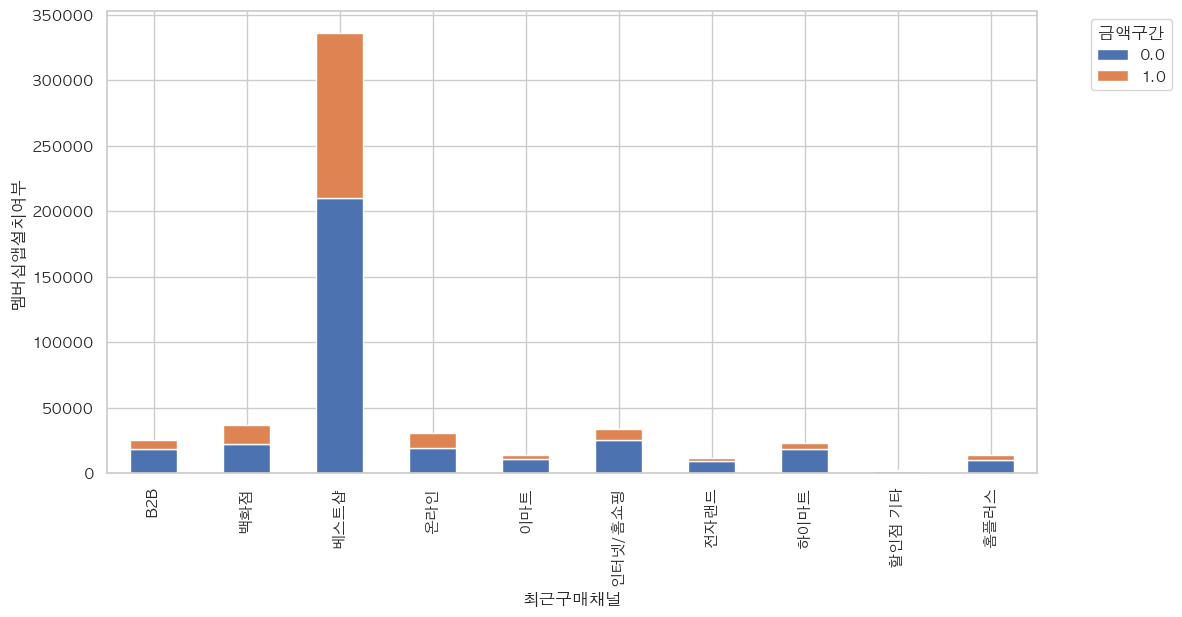

멤버십앱설치여부,최근구매채널,0.0,1.0,최근구매채널별빈도합
0,B2B,72.153624,27.846376,25673
1,백화점,61.467287,38.532713,36530
2,베스트샵,62.483373,37.516627,336059
3,온라인,63.440011,36.559989,30372
4,이마트,76.809955,23.190045,14144
5,인터넷/홈쇼핑,75.520308,24.479692,33730
6,전자랜드,79.598291,20.401709,11700
7,하이마트,79.078445,20.921555,23048
8,할인점 기타,77.222489,22.777511,2081
9,홈플러스,73.057662,26.942338,13978


In [171]:
insightextract('최근구매채널', '멤버십앱설치여부')

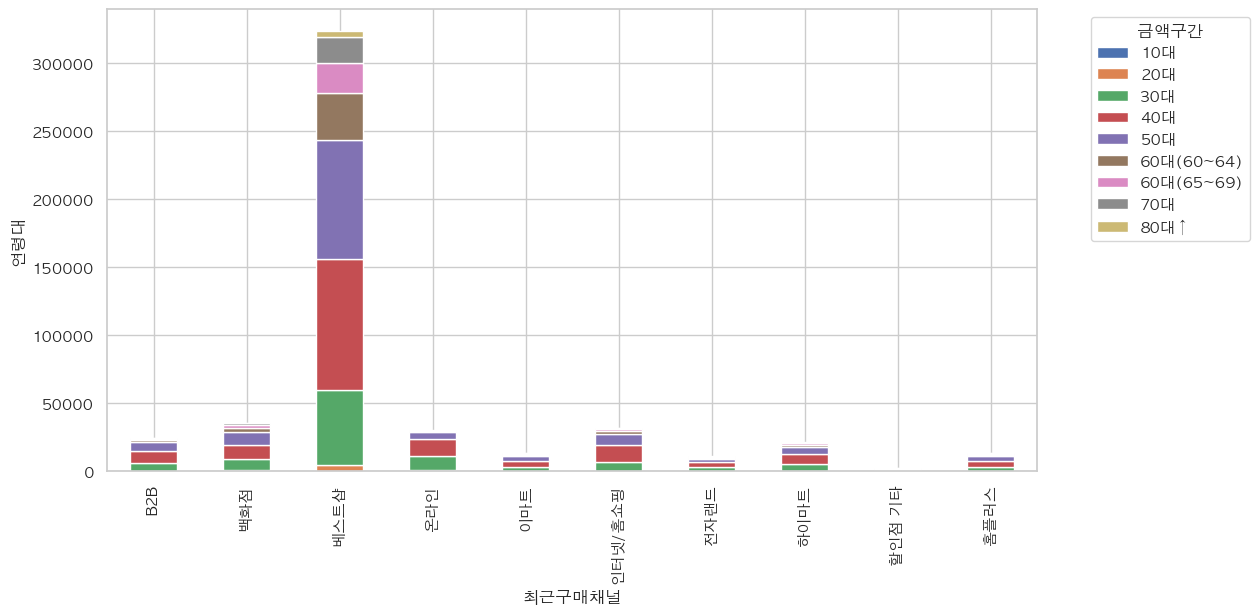

연령대,최근구매채널,10대,20대,30대,40대,50대,60대(60~64),60대(65~69),70대,80대↑,최근구매채널별빈도합
0,B2B,0.000000,1.448625,21.880356,38.492614,24.667428,7.006447,3.554232,2.558557,0.391741,24506.0
1,백화점,0.019837,1.289427,23.393884,29.353586,26.531017,10.097203,5.412758,3.471533,0.430754,35287.0
2,베스트샵,0.024398,1.286312,17.201678,29.802591,26.975484,10.676850,6.767574,5.961198,1.303915,323794.0
3,온라인,0.000000,2.327370,34.134760,41.799030,17.649223,2.631667,0.953018,0.438054,0.066878,29905.0
4,이마트,0.000000,1.058320,19.657735,34.211514,27.516325,8.939428,4.923816,3.355100,0.337762,13323.0
5,인터넷/홈쇼핑,0.000000,1.228831,20.718585,38.271528,25.643265,7.248230,4.073231,2.513801,0.302529,32063.0
6,전자랜드,0.046352,1.807732,24.807639,34.810420,21.572263,8.176509,4.208770,3.485677,1.084639,10787.0
7,하이마트,0.000000,1.251771,22.489372,36.589513,23.821445,7.935758,4.133207,3.197922,0.581011,21170.0
8,할인점 기타,0.000000,0.355872,10.981190,36.349771,31.520081,8.591764,6.710727,4.575496,0.915099,1967.0
9,홈플러스,0.044944,1.415730,19.767790,31.895131,29.220974,8.928839,4.913858,3.363296,0.449438,13350.0


In [172]:
insightextract('최근구매채널', '연령대')

연령대별로 구매체널이 다름. \
젊은층은 온라인에서 많이 구매 \
높은 연령층은 오프라인 체널에서 주로 구매

In [173]:
crm['아파트시세'].unique()

array(['1억↓', '3~4억', '5~6억', '1~2억', '11~15억', '16~29억', nan, '7~8억',
       '9~10억', '30억↑'], dtype=object)

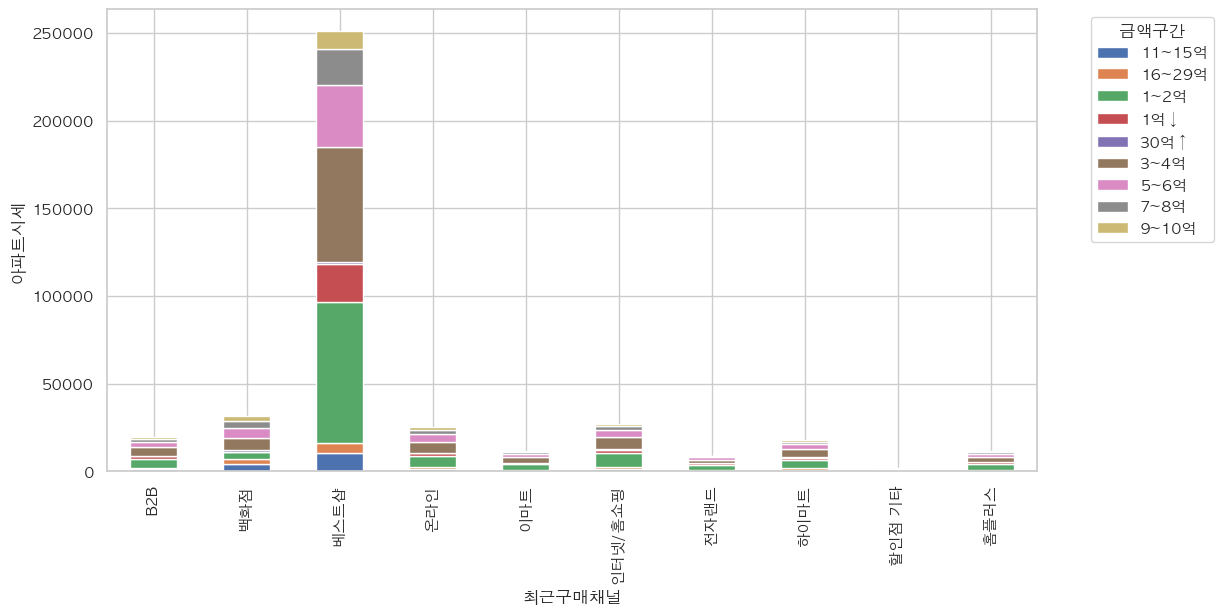

아파트시세,최근구매채널,11~15억,16~29억,1~2억,1억↓,30억↑,3~4억,5~6억,7~8억,9~10억,최근구매채널별빈도합
0,B2B,5.775822,3.279276,26.392797,7.950069,0.455313,26.162582,16.012687,9.034634,4.936819,19547.0
1,백화점,12.119579,9.247400,12.572914,1.547045,2.637586,21.027771,18.228506,13.828303,8.790895,31544.0
2,베스트샵,4.185415,2.297180,31.922798,8.777784,0.457525,26.116734,14.000892,8.091298,4.150374,251134.0
3,온라인,5.952286,3.806741,25.402290,5.283804,0.648467,26.078777,17.244416,10.635658,4.947562,24982.0
4,이마트,4.592372,2.519244,29.181246,5.886984,0.454864,26.513296,16.733730,8.852344,5.265920,11432.0
5,인터넷/홈쇼핑,5.240851,2.988980,30.199388,6.987801,0.615487,25.069104,15.084952,9.040652,4.772786,27133.0
6,전자랜드,3.184497,2.572529,34.360834,9.428830,0.475975,24.909338,13.961922,7.060290,4.045784,8824.0
7,하이마트,4.788732,3.752113,28.276056,6.681690,0.777465,26.766197,15.166197,8.473239,5.318310,17750.0
8,할인점 기타,6.612996,4.715354,16.733755,2.070155,1.840138,27.659574,19.896492,10.465785,10.005750,1739.0
9,홈플러스,4.009806,1.190685,31.509368,8.623709,0.000000,27.429522,15.189984,7.651900,4.395027,11422.0


In [174]:
insightextract('최근구매채널', '아파트시세')

* 아파트시세가 높을수록 타 채널 대비 백화점에서 구매하는 비중이 높았고,
* 아파트시세가 낮을수록 다 채널 대비 전자랜드, 인터넷/홈쇼핑으로 구매하는 비중이 높았음

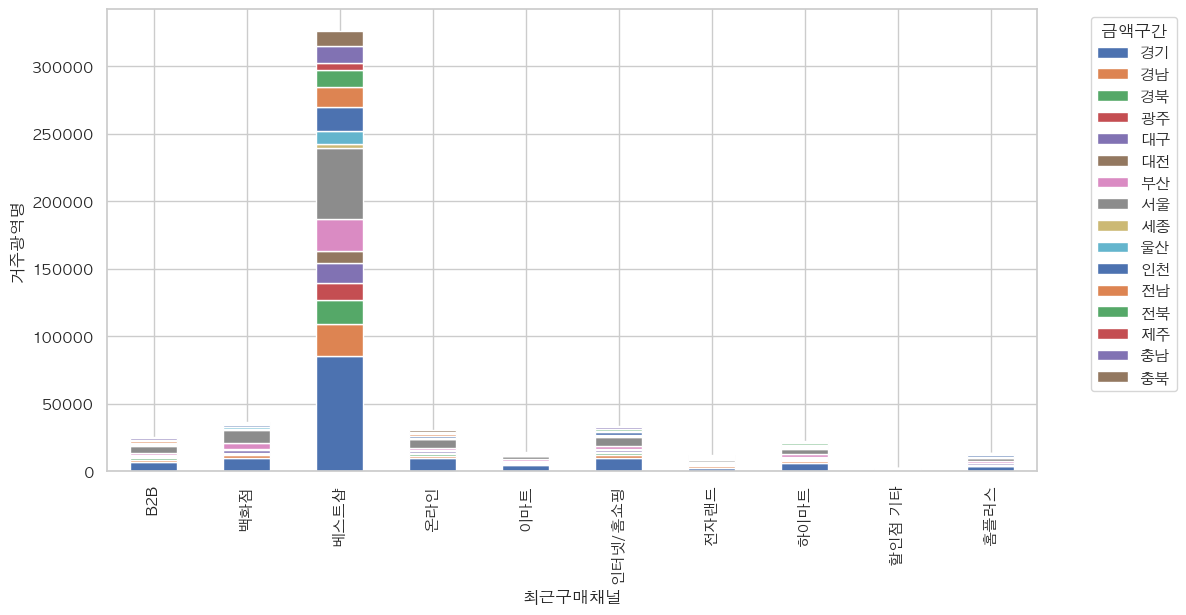

거주광역명,최근구매채널,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북,최근구매채널별빈도합
0,B2B,27.293587,5.811607,4.968944,3.422083,4.003640,2.638763,6.068758,20.655141,1.182894,2.500297,5.202358,3.754401,3.220319,1.720932,3.433952,4.122325,25277.0
1,백화점,27.787127,5.382514,2.198803,1.001462,6.601926,3.018181,11.068502,28.005076,0.697989,3.931360,3.953431,0.306232,1.509090,0.151737,3.390625,0.995944,36247.0
2,베스트샵,26.073504,7.284770,5.506509,3.851214,4.668128,2.610816,7.249199,16.138667,1.069594,2.960090,5.446712,4.336640,3.880039,1.690560,3.786204,3.447356,326105.0
3,온라인,31.172665,6.137004,5.486814,2.298889,3.605905,2.736772,5.297728,21.933986,0.935479,1.973793,5.596285,3.141483,2.255764,0.935479,2.706917,3.785039,30145.0
4,이마트,34.790385,4.607240,3.927601,2.861640,5.286879,3.770210,7.819431,16.840750,1.209043,1.445128,5.093719,3.455430,1.688367,1.337817,3.777364,2.088997,13978.0
5,인터넷/홈쇼핑,29.489277,6.166156,3.959071,3.405812,3.691365,2.611618,7.046611,19.328356,1.100568,2.748446,6.184003,3.301704,2.849579,1.442637,3.878759,2.796038,33619.0
6,전자랜드,19.157550,12.455853,5.840296,4.186407,4.169179,3.910759,7.804290,12.748729,1.421311,3.350848,4.427599,4.341459,7.709536,1.309329,4.358687,2.808166,11609.0
7,하이마트,26.585809,6.768182,3.935195,3.674029,3.620911,2.664778,7.662343,18.812802,0.783498,3.355318,5.586295,3.381878,4.023726,2.129166,3.625338,3.390731,22591.0
8,할인점 기타,30.728667,2.061361,2.732502,0.000000,8.389262,5.081496,4.985618,29.817833,1.342282,5.656759,3.883030,1.006711,0.671141,0.000000,2.828380,0.814957,2086.0
9,홈플러스,25.984711,3.356389,3.006917,3.392792,6.159447,3.472880,9.195486,15.784492,1.019294,7.062250,10.651620,2.875865,2.897707,0.451402,1.616309,3.072443,13735.0


In [175]:
insightextract('최근구매채널', '거주광역명')

* 각 거주광역시 별로 최근구매채널의 차이가 있는지를 비교. 만약에 이 차이가 지역 별로 크다면, 해당 차이를 이용해서 missing value를 채우는데에 잘 활용할 수 있을 것으로 활용됨
* 경기 : 이마트, 경남 : 전자랜드, 경북 : 전자랜드, 광주 : 전자랜드, 대구 : 할인점 등 지역 별로 상이한 채널을 이용하는 두드러진 특징이 존재

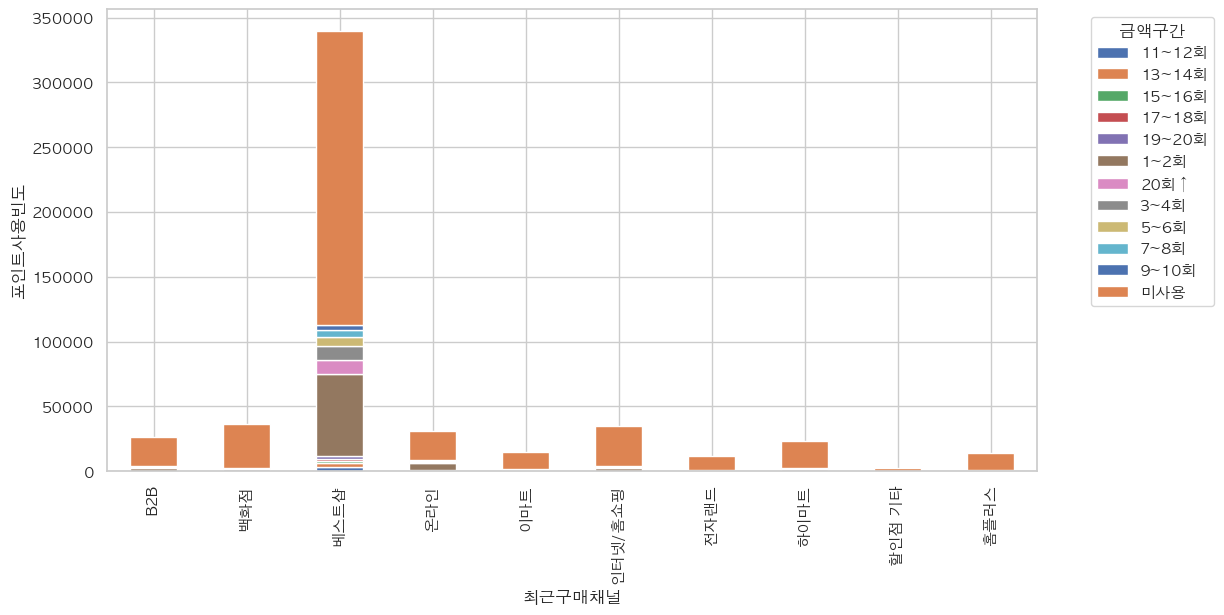

포인트사용빈도,최근구매채널,11~12회,13~14회,15~16회,17~18회,19~20회,1~2회,20회↑,3~4회,5~6회,7~8회,9~10회,미사용,최근구매채널별빈도합
0,B2B,0.418346,0.483000,0.311858,0.148323,0.159732,7.982810,1.315890,1.236023,0.806268,0.650338,0.384118,86.103294,26294.0
1,백화점,0.213190,0.172192,0.210457,0.163993,0.073797,3.091262,0.669637,0.765299,0.809031,0.442780,0.196791,93.191571,36587.0
2,베스트샵,0.974617,0.765202,0.521327,0.558439,0.528691,18.815497,3.165370,3.209845,1.906821,1.720380,1.139262,66.694549,339518.0
3,온라인,0.565209,0.581358,0.474776,0.242232,0.187326,17.185582,2.729152,2.922938,1.301596,1.117499,0.742846,71.949486,30962.0
4,이마트,0.316129,0.288640,0.219916,0.199299,0.158065,5.917119,0.591025,0.804068,0.687238,0.652876,0.274895,89.890729,14551.0
5,인터넷/홈쇼핑,0.442923,0.330754,0.258851,0.224338,0.129426,6.646726,1.426558,1.228105,0.716155,0.609739,0.396905,87.589519,34769.0
6,전자랜드,0.084055,0.361436,0.050433,0.327814,0.252164,5.194587,1.126334,0.781710,0.285786,0.285786,0.252164,90.997731,11897.0
7,하이마트,0.384698,0.252191,0.243642,0.111135,0.132507,4.680487,0.884804,0.735200,0.559949,0.410344,0.320581,91.284462,23395.0
8,할인점 기타,0.189573,0.000000,0.900474,0.379147,0.000000,5.829384,1.421801,1.232227,0.805687,0.568720,0.568720,88.104265,2110.0
9,홈플러스,0.190584,0.084704,0.091763,0.176466,0.091763,3.663443,0.451754,0.628221,0.416461,0.155290,0.310581,93.738971,14167.0


In [176]:
insightextract('최근구매채널', '포인트사용빈도')

In [177]:
crm['포인트사용빈도']

0          미사용
1          미사용
2          미사용
3          미사용
4          미사용
          ... 
104347     미사용
104348     미사용
104349     미사용
104350     미사용
104351    1~2회
Name: 포인트사용빈도, Length: 104352, dtype: object

* 베스트샵에서는 1~2회의 비중이 가장 높게 나타나며, 포인트를 거의 사용하지 않음

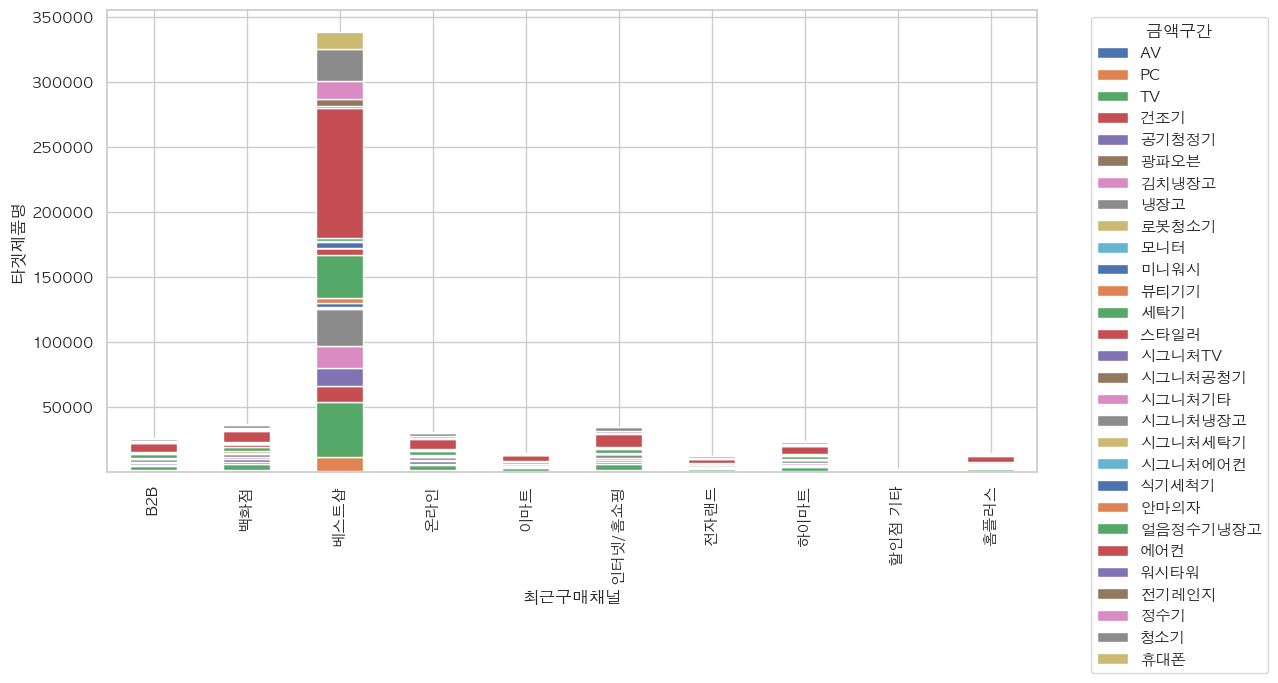

타겟제품명,최근구매채널,AV,PC,TV,건조기,공기청정기,광파오븐,김치냉장고,냉장고,로봇청소기,모니터,미니워시,뷰티기기,세탁기,스타일러,시그니처TV,시그니처공청기,시그니처기타,시그니처냉장고,시그니처세탁기,시그니처에어컨,식기세척기,안마의자,얼음정수기냉장고,에어컨,워시타워,전기레인지,정수기,청소기,휴대폰,최근구매채널별빈도합
0,B2B,0.172222,3.432967,12.070879,4.286425,4.493092,0.003827,3.880746,9.560259,0.229630,0.501359,0.987409,1.155804,10.490260,2.376670,0.042099,0.003827,0.000000,0.015309,0.000000,0.000000,2.181484,0.149259,0.704198,27.804355,0.459260,1.461977,3.436794,7.432355,2.667534,26129.0
1,백화점,0.175213,2.819832,13.247735,4.760862,5.962713,0.000000,4.243436,6.920908,0.473622,0.109508,1.492047,2.650094,9.951543,4.404961,0.476360,0.016426,0.010951,0.095820,0.019164,0.005475,2.677471,0.043803,1.486572,23.708490,0.955458,2.206587,2.296931,7.703890,1.084130,36527.0
2,베스트샵,0.181072,3.129025,12.506055,3.625569,4.198027,0.000000,4.883323,8.430614,0.146807,0.213564,1.011107,1.121876,9.752762,1.565546,0.064690,0.004431,0.000295,0.005317,0.008862,0.000000,1.362321,0.168961,0.741419,29.503751,0.474685,1.519171,4.180008,7.214509,3.986235,338540.0
3,온라인,1.054407,3.620673,10.991792,4.431756,5.891704,0.000000,3.241086,6.813094,0.304967,3.267041,0.833793,1.956331,8.552055,2.498135,0.126529,0.012977,0.000000,0.003244,0.012977,0.000000,2.627908,0.165461,0.778639,25.117607,0.752685,1.781137,4.490153,7.319210,3.354638,30823.0
4,이마트,0.075852,2.634119,14.129086,5.206178,3.523652,0.000000,4.695904,8.254034,0.089643,0.103434,1.627362,0.648186,10.846780,1.985933,0.055165,0.000000,0.000000,0.000000,0.006896,0.000000,1.827334,0.048269,0.917115,30.575093,0.710247,1.689422,2.972004,5.654392,1.723900,14502.0
5,인터넷/홈쇼핑,0.057665,2.430586,13.487876,4.797740,4.667993,0.000000,4.278753,8.796817,0.170112,0.175879,0.916876,0.968774,10.474872,1.911599,0.043249,0.005767,0.000000,0.002883,0.011533,0.000000,1.412796,0.083614,0.654499,28.463512,0.804429,1.467578,4.134590,7.937606,1.842401,34683.0
6,전자랜드,0.118024,3.026471,12.325072,4.957006,4.307874,0.000000,5.698870,9.627382,0.109594,0.219187,1.011634,1.416287,10.993087,2.352049,0.050582,0.042151,0.000000,0.000000,0.008430,0.000000,1.972686,0.075873,0.649132,24.498398,0.792446,1.787220,3.228798,8.843365,1.888383,11862.0
7,하이마트,0.111468,2.919614,11.828510,4.321543,4.120043,0.000000,4.600214,9.303323,0.222937,0.222937,1.251876,1.286174,10.456592,2.615220,0.090032,0.004287,0.000000,0.004287,0.008574,0.000000,2.336549,0.107181,0.908896,28.441586,0.604502,1.942122,3.584137,6.821008,1.886388,23325.0
8,할인점 기타,0.143198,1.861575,11.933174,4.343675,3.150358,0.000000,4.868735,8.496420,0.047733,0.190931,0.715990,1.288783,10.787589,2.195704,0.047733,0.000000,0.000000,0.000000,0.000000,0.000000,1.670644,0.047733,1.002387,36.563246,0.190931,1.766110,2.004773,5.059666,1.622912,2095.0
9,홈플러스,0.106120,3.211885,13.576229,4.195260,3.657588,0.000000,4.570216,8.496640,0.148567,0.169791,1.096569,1.322957,9.826671,1.789883,0.056597,0.007075,0.000000,0.000000,0.014149,0.000000,1.188539,0.042448,0.650867,33.356915,0.926778,1.605943,2.221436,6.048815,1.712062,14135.0


In [178]:
insightextract('최근구매채널', '타겟제품명')

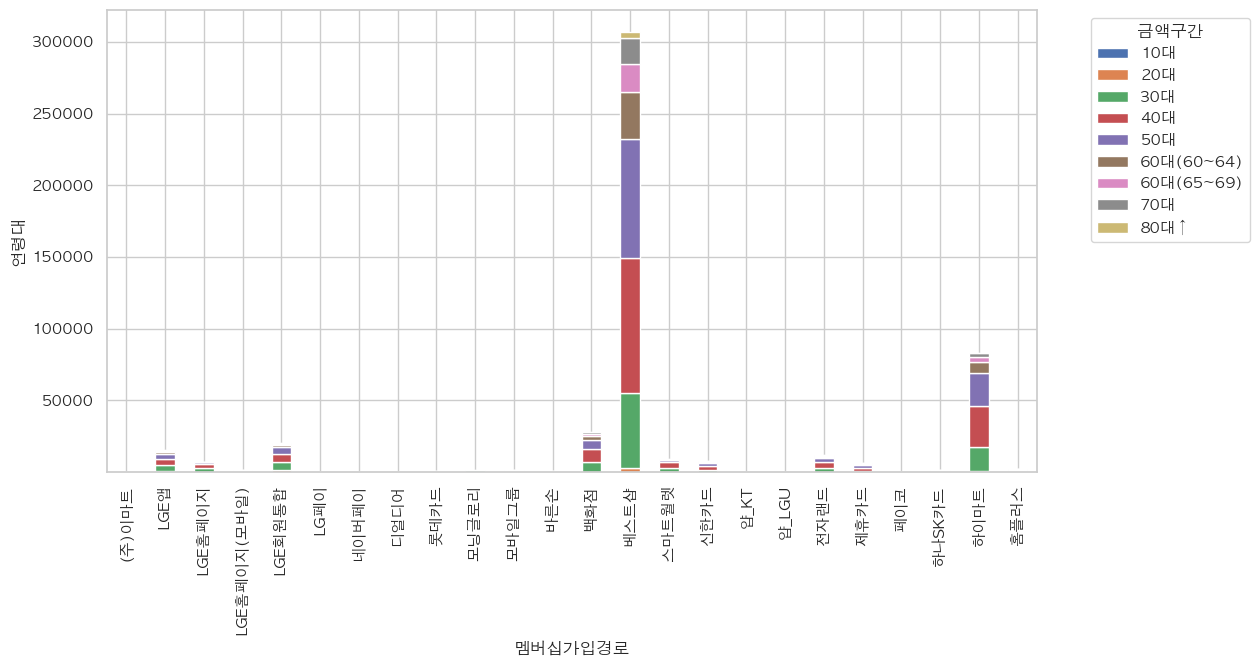

연령대,멤버십가입경로,10대,20대,30대,40대,50대,60대(60~64),60대(65~69),70대,80대↑,멤버십가입경로별빈도합
0,(주)이마트,0.000000,1.119403,21.641791,54.850746,9.701493,11.194030,1.492537,0.000000,0.000000,268.0
1,LGE앱,0.051450,3.710850,25.705833,27.558042,23.538491,8.849444,5.826741,4.096726,0.662422,15549.0
2,LGE홈페이지,0.000000,2.867036,31.855956,43.462604,16.772853,3.351801,1.149584,0.429363,0.110803,7220.0
3,LGE홈페이지(모바일),0.000000,6.617647,39.869281,34.395425,14.705882,1.960784,1.470588,0.980392,0.000000,1224.0
4,LGE회원통합,0.078481,5.616324,28.846814,28.778143,21.783489,6.675823,4.708883,3.050964,0.461078,20387.0
5,LG페이,0.000000,0.000000,23.809524,38.095238,38.095238,0.000000,0.000000,0.000000,0.000000,21.0
6,네이버페이,0.000000,13.636364,0.000000,68.181818,18.181818,0.000000,0.000000,0.000000,0.000000,22.0
7,디얼디어,0.000000,41.176471,58.823529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.0
8,롯데카드,0.000000,0.000000,17.688679,30.424528,19.339623,20.047170,9.433962,1.650943,1.415094,424.0
9,모닝글로리,0.000000,4.247991,81.859931,13.892078,0.000000,0.000000,0.000000,0.000000,0.000000,1742.0


In [179]:
insightextract('멤버십가입경로', '연령대')

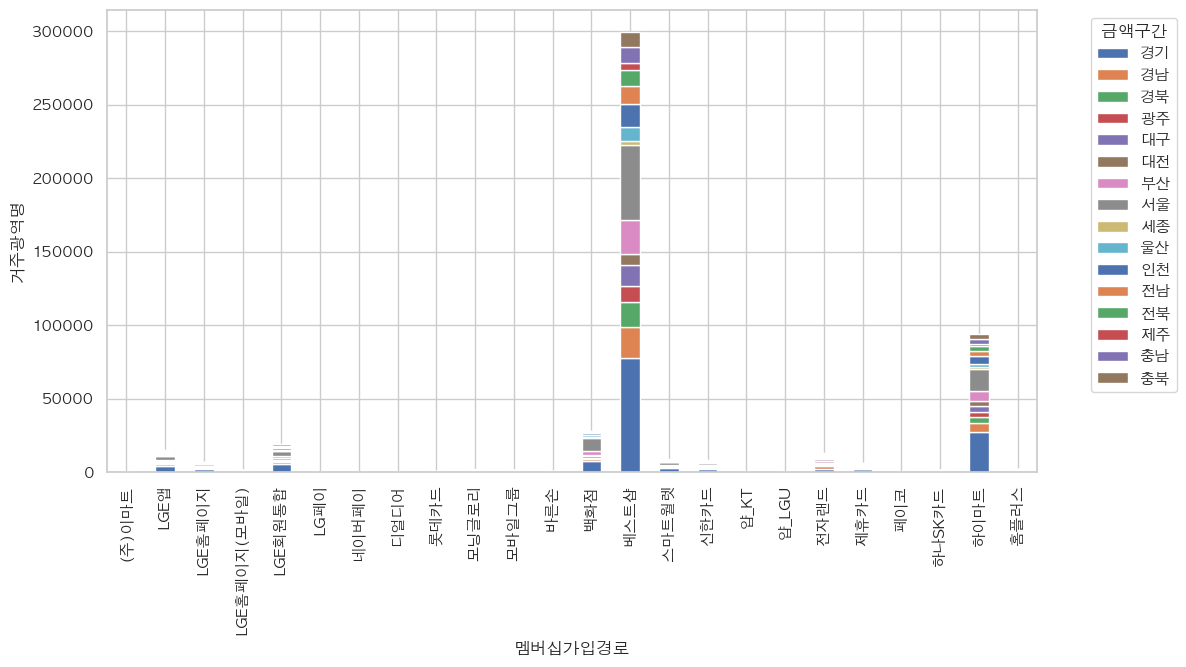

거주광역명,멤버십가입경로,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북,멤버십가입경로별빈도합
0,(주)이마트,30.801688,3.797468,6.329114,4.641350,4.641350,5.485232,6.329114,27.426160,0.000000,1.265823,0.421941,0.843882,3.375527,0.000000,0.000000,4.641350,237.0
1,LGE앱,29.272993,5.555556,3.362573,2.465444,5.482456,2.638224,4.332802,19.417863,1.003456,3.169856,6.705210,4.186603,3.203083,1.322435,4.040404,3.841042,15048.0
2,LGE홈페이지,30.229267,6.920464,4.783470,2.377583,3.736202,3.453156,6.198698,19.530144,1.386923,2.462496,6.354373,2.858760,2.731390,0.905746,2.575715,3.495613,7066.0
3,LGE홈페이지(모바일),35.574468,4.680851,5.106383,1.106383,4.085106,2.978723,6.127660,16.170213,2.127660,2.042553,7.319149,3.489362,1.106383,1.446809,4.255319,2.382979,1175.0
4,LGE회원통합,29.765108,5.116929,4.371896,2.959437,5.427359,1.960886,5.292839,19.396730,1.200331,2.447227,6.555257,4.082161,3.125000,0.936465,4.439156,2.923220,19328.0
5,LG페이,0.000000,0.000000,0.000000,0.000000,18.750000,0.000000,0.000000,81.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.0
6,네이버페이,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.363636,0.000000,0.000000,13.636364,0.000000,0.000000,0.000000,0.000000,0.000000,22.0
7,디얼디어,0.000000,41.176471,0.000000,0.000000,0.000000,0.000000,0.000000,58.823529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.0
8,롯데카드,20.574163,8.373206,8.373206,6.220096,9.808612,0.000000,6.937799,15.550239,2.631579,1.435407,7.177033,3.588517,4.545455,0.000000,2.870813,1.913876,418.0
9,모닝글로리,34.970760,6.900585,2.982456,1.871345,5.263158,3.684211,3.450292,19.532164,0.877193,2.690058,7.368421,1.461988,2.865497,1.345029,3.450292,1.286550,1710.0


In [180]:
insightextract('멤버십가입경로', '거주광역명')

In [181]:
list(crm['연령대'].unique())

[nan,
 '40대',
 '50대',
 '60대(60~64)',
 '60대(65~69)',
 '30대',
 '70대',
 '20대',
 '80대↑',
 '10대']

In [182]:
total_df.columns

Index(['고객ID', '매출일자(배송완료일자)', '타겟제품명', '금액', 'label', '년도', '분기', '금액2',
       '고가여부', '멤버십고객여부', '케어솔루션고객여부', '케어솔루션품목수', '케어십가입여부', '케어십품목수',
       '최근3년구매금액', '최근구매채널', 'Only&Best품목수', '건강관리가전품목수', '연령대', '주거형태',
       '아파트시세', '아파트평형대', '포인트사용빈도', '보유멤버십포인트', '멤버십가입경로', '제휴카드보유여부',
       '프리미엄카드보유여부', '제휴가입여부', '멤버십앱설치여부', '거주광역명', '거주시군구명', '거주행정동명',
       '고가제품구매빈도', '고가제품구매빈도', '금액_x', '금액_y', '고가구매고객여부', '총구매빈도', 'year'],
      dtype='object')

In [183]:
len(list(crm['거주행정동명'].unique()))

2920